In [1]:
from utils import *

# Explorative analysis - Results

In [2]:
respondents, results, cardsE, cardsB = loadData()
latestMatrices = finalMatrices()

In [3]:
results.head()

,respondent,card,category,categoryId,categoryStandardized,order,variant,categoryEdited,agreement
0,5,Air Conditioners,White Goods / Household items,1,White goods,16,E50,white goods household items,53.333333
1,5,Air Purifiers,White Goods / Household items,1,White goods,10,E50,white goods household items,53.333333
2,5,Cameras,Electrical items,2,Electronics,25,E50,electrical items,33.384615
3,5,Chargers,Electrical items,2,Electronics,18,E50,electrical items,33.384615
4,5,Coffee Makers,White Goods / Household items,1,White goods,15,E50,white goods household items,53.333333


## Study variants

In [4]:
results.groupby('variant').size()

variant
B30    1200
B50    2000
E30    1200
E50    2000
dtype: int64

<Axes: >

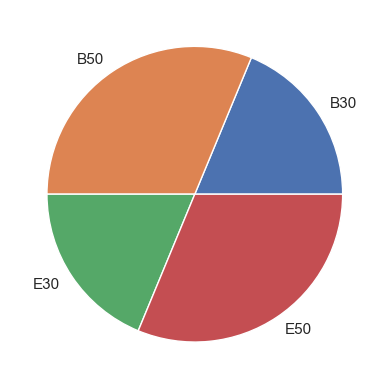

In [5]:
results.groupby('variant').size().plot.pie()

## Similarity matrices

### Clustered

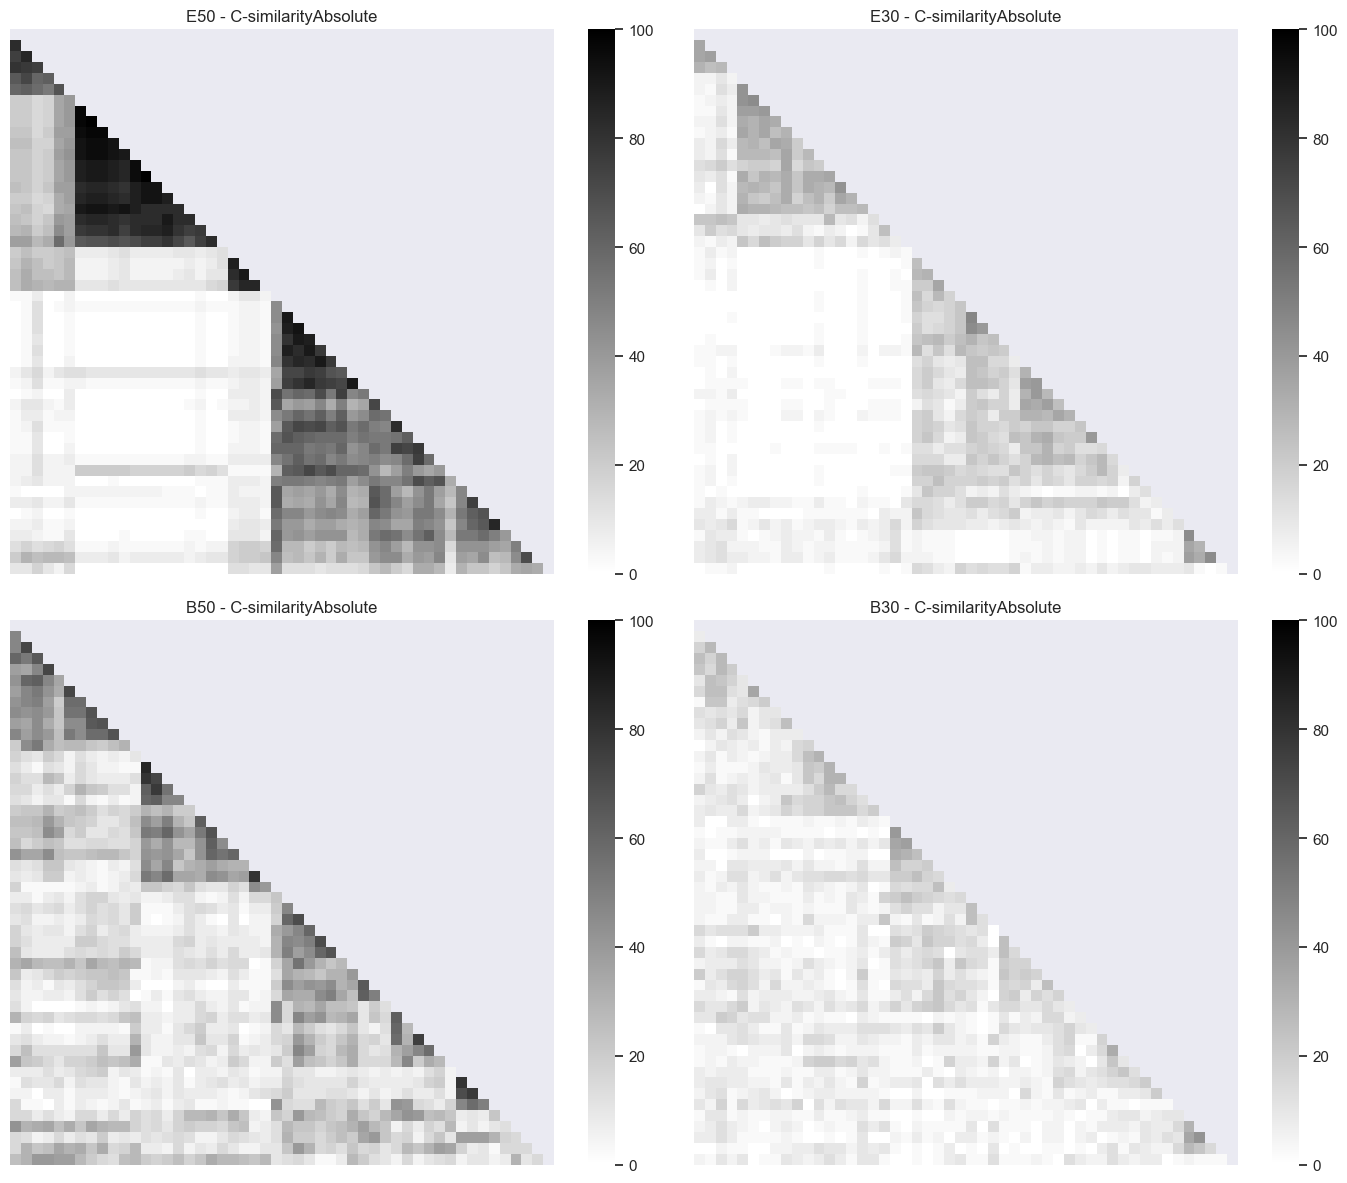

In [6]:
plotMatrices(latestMatrices, 'C-similarityAbsolute')

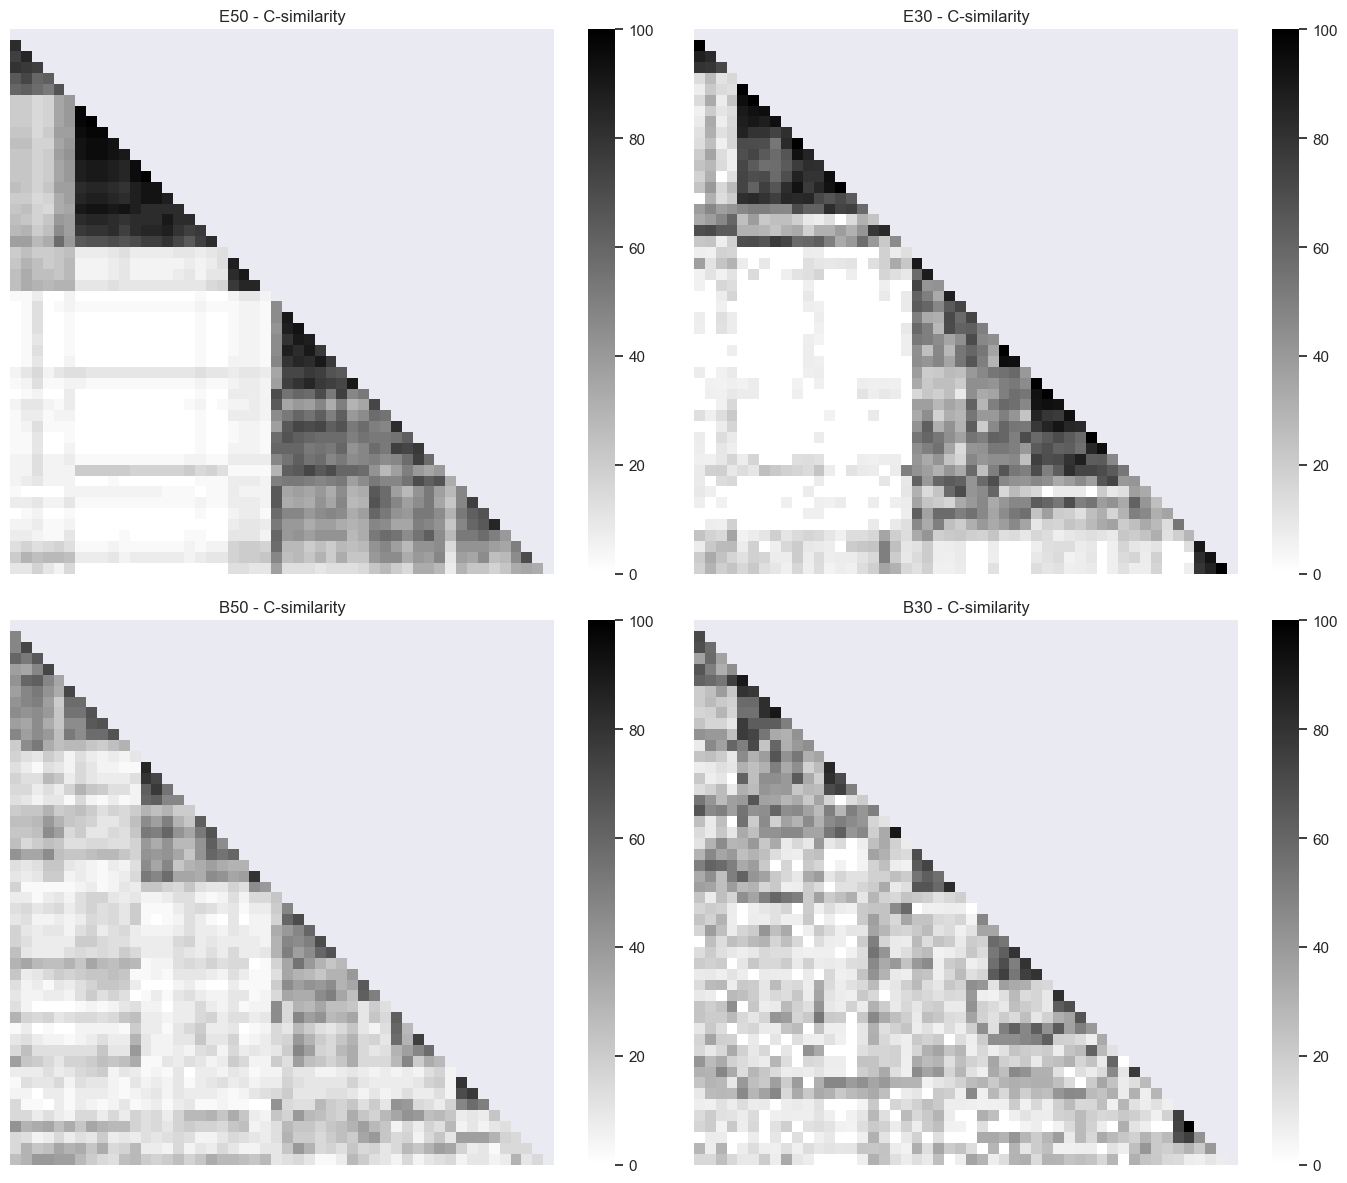

In [7]:
plotMatrices(latestMatrices, 'C-similarity')

Text(0.5, -0.1, '(f) B30 absolute')

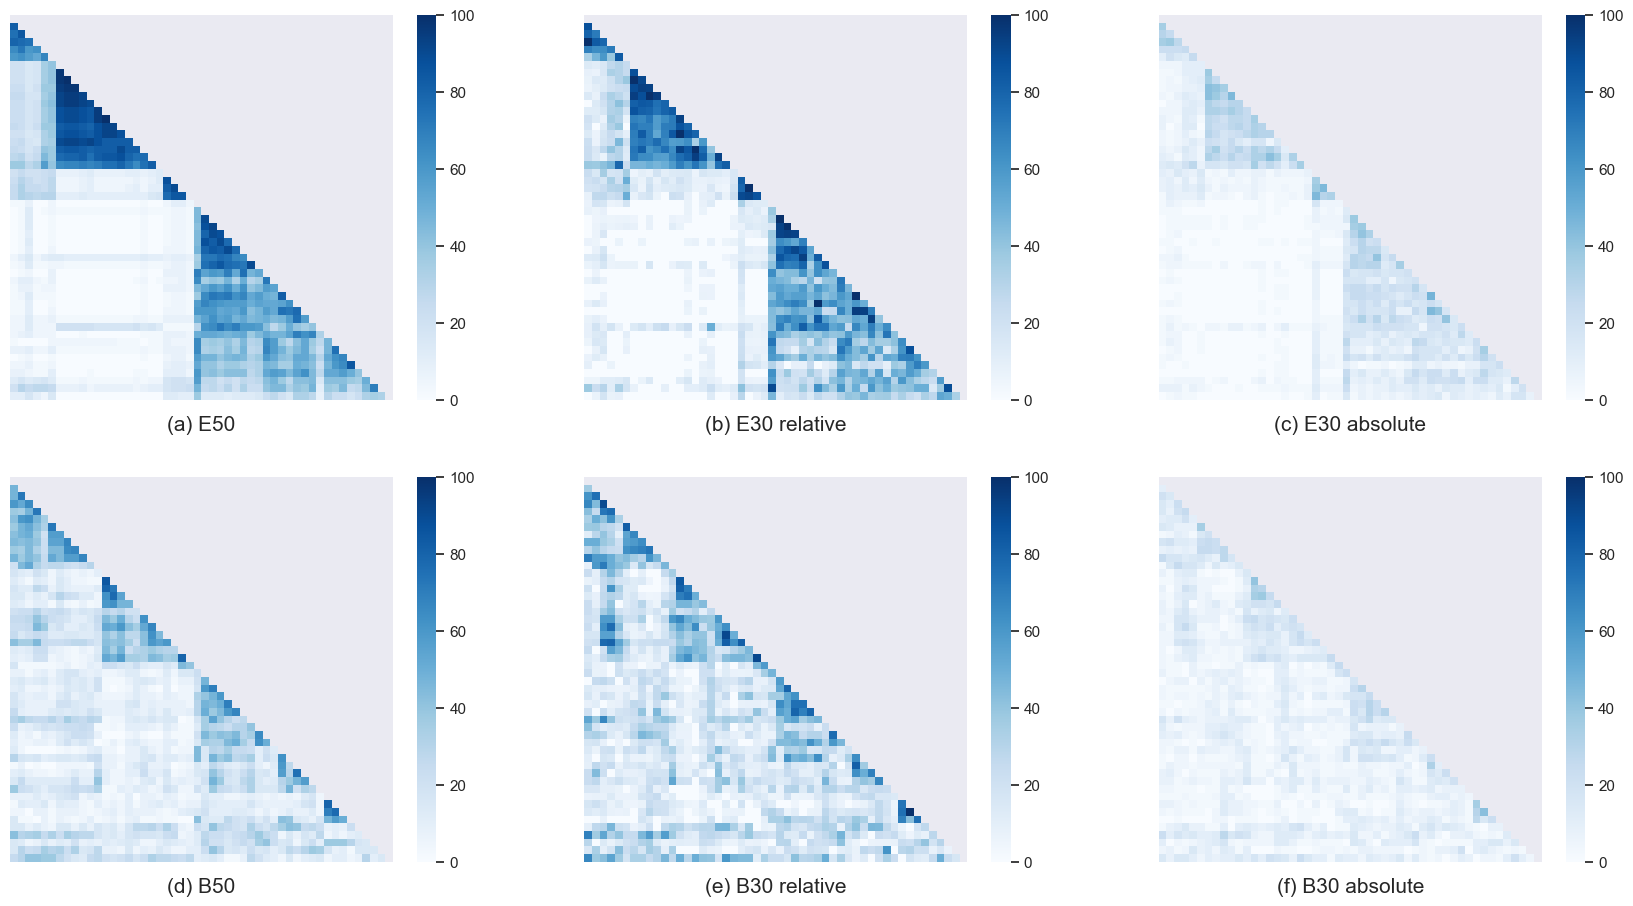

In [8]:
cr = makeMatrix('C-similarity', results[results.variant=='E50'], cardsE, 40)
crB = makeMatrix('C-similarity', results[results.variant=='B50'], cardsB, 40)
m = makeMatrix('C-similarity', results[results.variant=='E30'], cardsE, 40, clusterHistory=False, clusteredOrder=cr.index.values)
mB = makeMatrix('C-similarity', results[results.variant=='B30'], cardsB, 40, clusterHistory=False, clusteredOrder=crB.index.values)
m2 = makeMatrix('C-similarityAbsolute', results[results.variant=='E30'], cardsE, 40, clusterHistory=False, clusteredOrder=cr.index.values)
m2B = makeMatrix('C-similarityAbsolute', results[results.variant=='B30'], cardsB, 40, clusterHistory=False, clusteredOrder=crB.index.values)

_, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(21, 11))
sns.heatmap(m, mask=np.triu(np.ones_like(m, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], ax=ax2)
sns.heatmap(cr, mask=np.triu(np.ones_like(cr, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], ax=ax1)
sns.heatmap(m2, mask=np.triu(np.ones_like(m2, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], ax=ax3)
sns.heatmap(mB, mask=np.triu(np.ones_like(mB, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], ax=ax5)
sns.heatmap(crB, mask=np.triu(np.ones_like(crB, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], ax=ax4)
sns.heatmap(m2B, mask=np.triu(np.ones_like(m2B, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], ax=ax6)
ax2.set_title('(b) E30 relative', y=-0.1, fontsize=15)
ax1.set_title('(a) E50', y=-0.1, fontsize=15)
ax3.set_title('(c) E30 absolute', y=-0.1, fontsize=15)
ax5.set_title('(e) B30 relative', y=-0.1, fontsize=15)
ax4.set_title('(d) B50', y=-0.1, fontsize=15)
ax6.set_title('(f) B30 absolute', y=-0.1, fontsize=15)

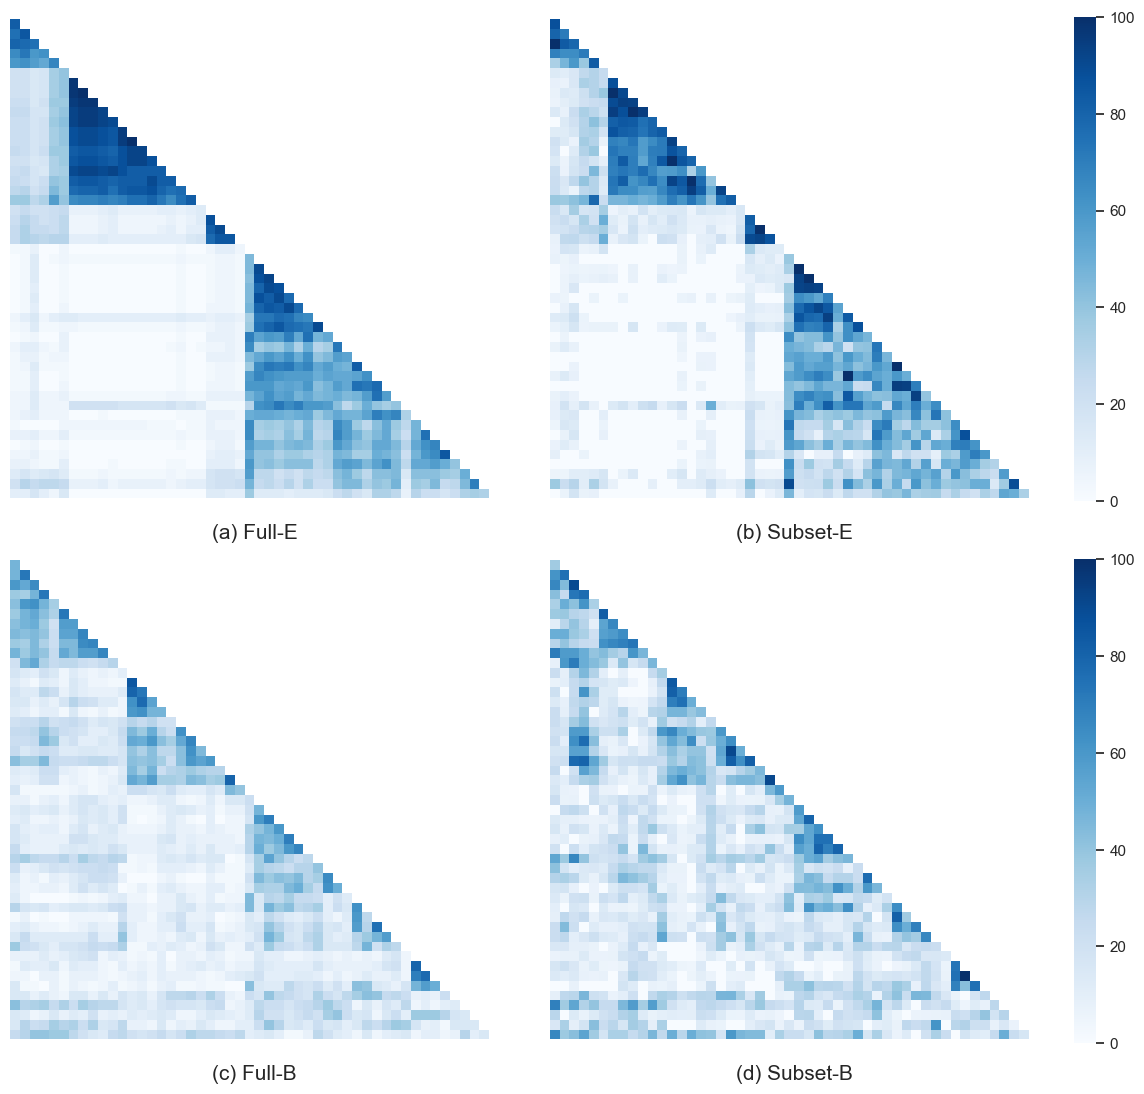

In [9]:
sns.set_theme(style='white')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(11, 11))
h2 = sns.heatmap(m, mask=np.triu(np.ones_like(m, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], ax=ax2, cbar=False, square=True)
sns.heatmap(cr, mask=np.triu(np.ones_like(cr, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], ax=ax1, cbar=False, square=True)

h4 = sns.heatmap(mB, mask=np.triu(np.ones_like(mB, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], ax=ax4, cbar=False, square=True)
sns.heatmap(crB, mask=np.triu(np.ones_like(crB, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], ax=ax3, cbar=False, square=True)

ax2.set_title('(b) Subset-E', y=-0.1, fontsize=15)
ax1.set_title('(a) Full-E', y=-0.1, fontsize=15)

ax4.set_title('(d) Subset-B', y=-0.1, fontsize=15)
ax3.set_title('(c) Full-B', y=-0.1, fontsize=15)
fig.tight_layout()

cbar_ax = fig.add_axes([1, 0.537, 0.02, 0.44])
fig.colorbar(h2.collections[0], cax=cbar_ax).outline.set_visible(False)

cbar_ax2 = fig.add_axes([1, 0.044, 0.02, 0.44])
fig.colorbar(h4.collections[0], cax=cbar_ax2).outline.set_visible(False)

### Unclustered

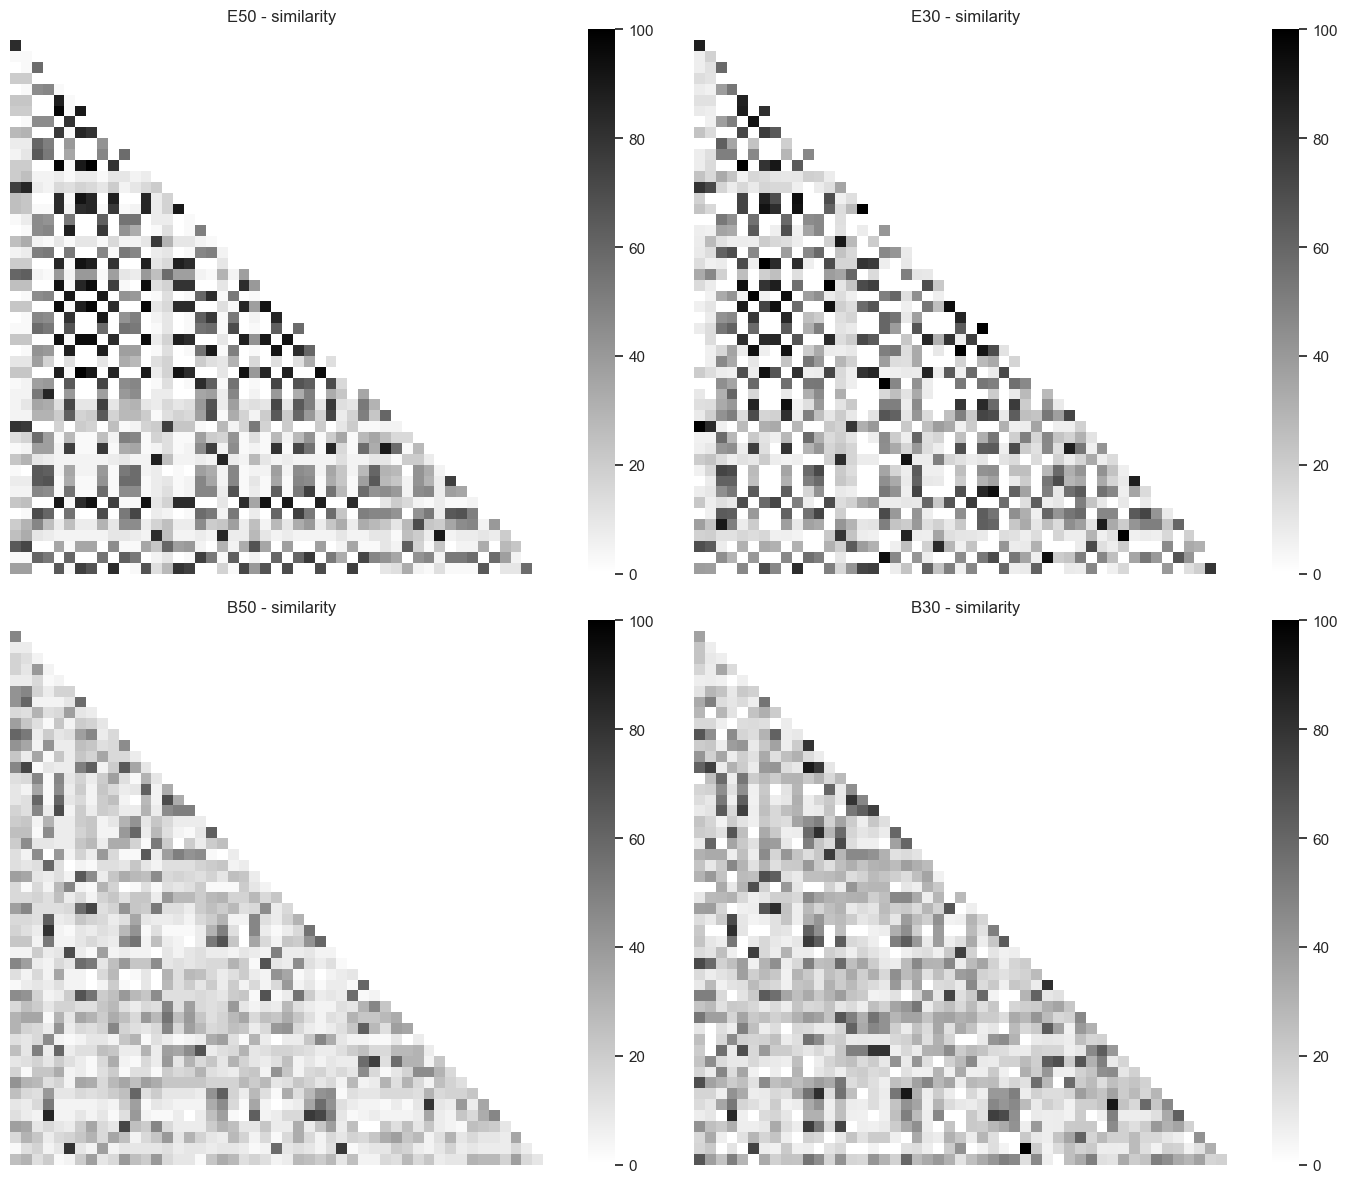

In [10]:
plotMatrices(latestMatrices, 'similarity')

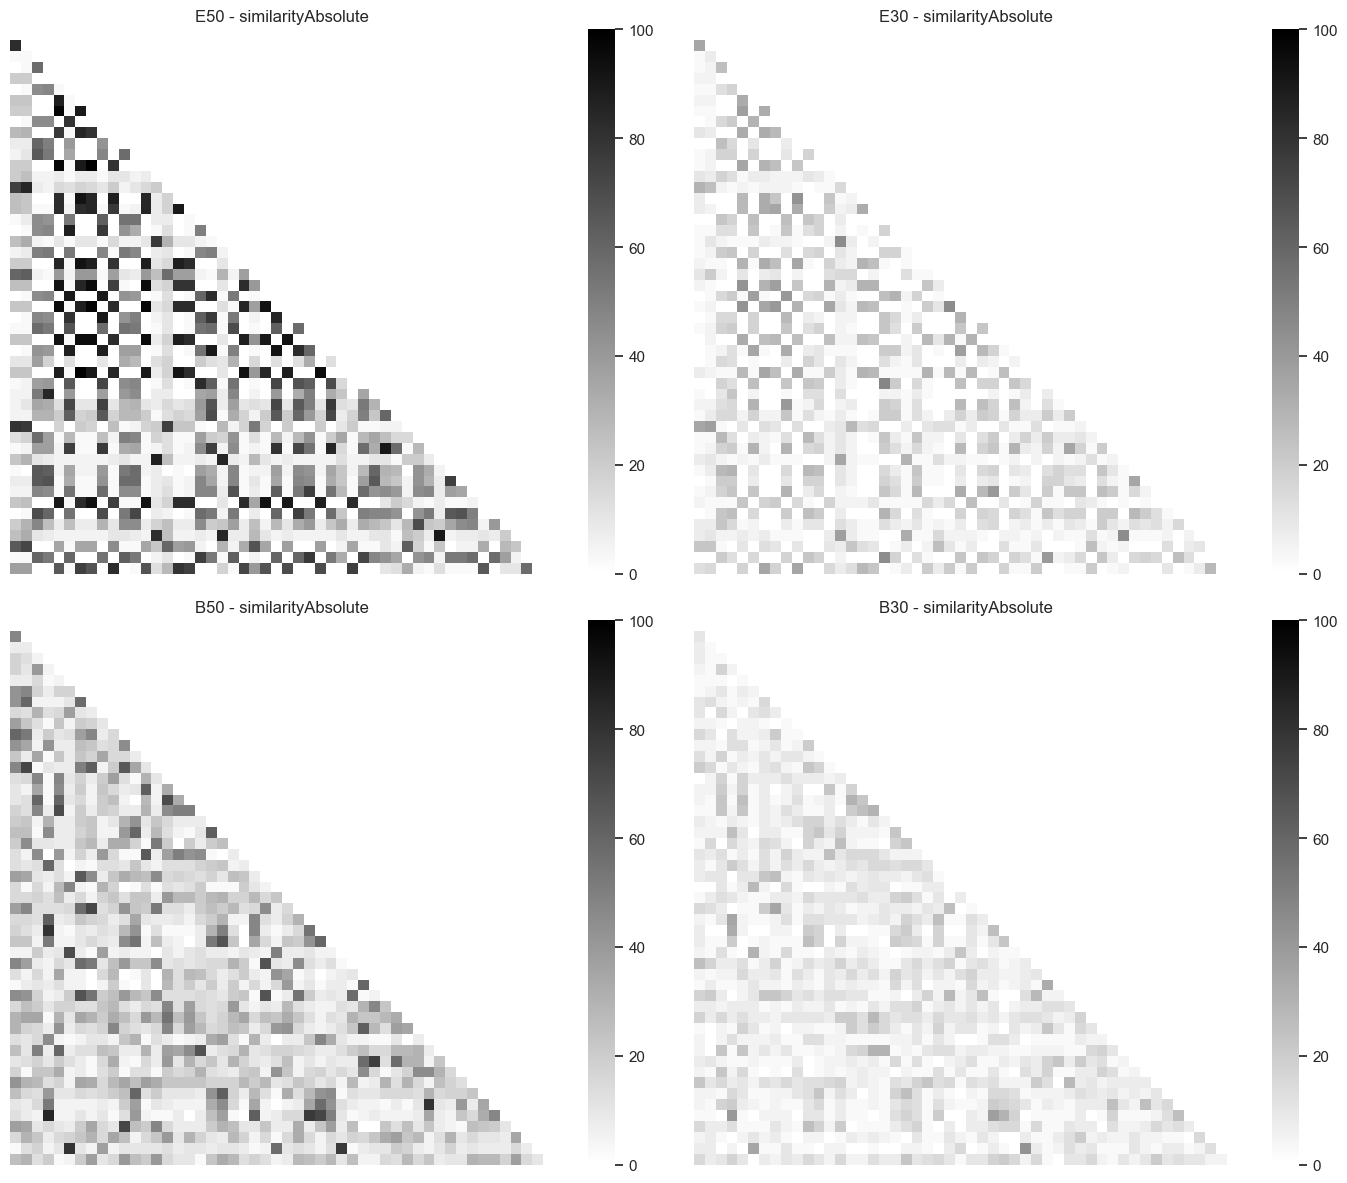

In [11]:
plotMatrices(latestMatrices, 'similarityAbsolute')

## Categories


In [12]:
catResults = results.drop_duplicates(subset=['variant', 'respondent', 'categoryId'], keep='first')[['variant', 'respondent', 'categoryEdited', 'categoryStandardized', 'category']].reset_index(drop=True)

### Word occurences

#### Study variants

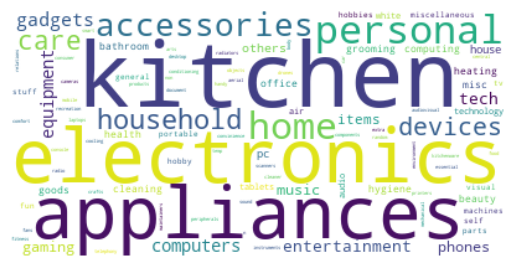

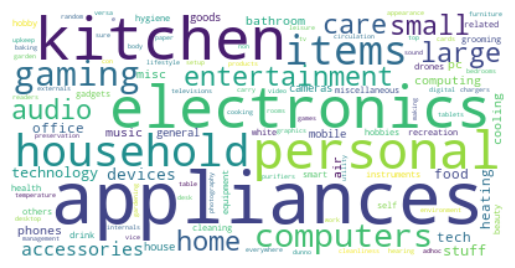

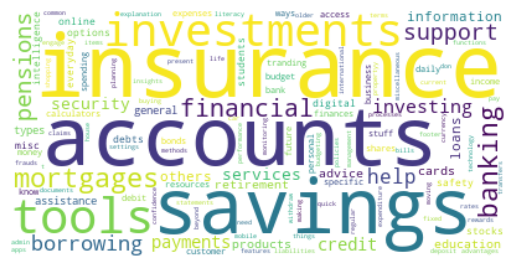

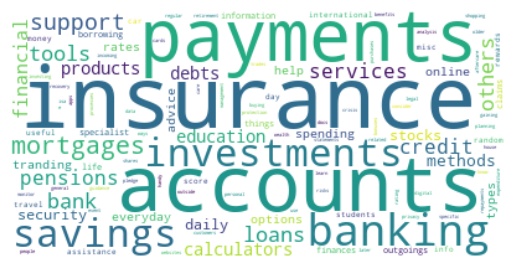

In [13]:
for variant in ['E50', 'E30', 'B50', 'B30']:
    wordcloud = WordCloud(collocations=False, background_color='white').generate(' '.join(getCategoryWords(catResults[catResults.variant==variant])))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [14]:
catResults[catResults.categoryEdited.str.contains('equipment')]

,variant,respondent,categoryEdited,categoryStandardized,category
19,E50,8,kitchen equipment,Kitchen,Kitchen Equipment
34,E50,11,other handy equipment,Misc/Other,Other Handy Equipment
37,E50,11,self care equipments,Care,Self Care Equipments
39,E50,11,office equipment,Office,Office Equipment
49,E50,15,computer equipment,Computers & Accessories,Computer Equipment
86,E50,25,kitchen equipment,Kitchen,Kitchen Equipment
95,E50,26,phone equipment,Phones & Accessories,Phone equipment
96,E50,26,computer equipment,Computers & Accessories,computer equipment
99,E50,26,music equipment,Music,Music equipment
101,E50,26,fitness equipment,Fitness equipment,Fitness equipment


In [15]:
catResults[catResults.categoryEdited.str.contains('small')]

,variant,respondent,categoryEdited,categoryStandardized,category
297,E30,18,small kitchen appliances,Kitchen,Small kitchen appliances
318,E30,21,smaller kitchen appliances electronics,Kitchen,Smaller kitchen appliances / electronics
369,E30,31,small appliances,Small appliances,Small appliances
376,E30,32,electronics small items,Electronics,electronics - small items
400,E30,38,small electrical,Electronics,Small Electrical
418,E30,41,small appliances,Small appliances,Small appliances
420,E30,41,small tech,Technology,Small Tech
439,E30,46,personal small items,Personal,Personal Small Items


In [16]:
catResults[catResults.categoryEdited.str.contains('large')]

,variant,respondent,categoryEdited,categoryStandardized,category
247,E30,6,general large appliances,Large appliances,General large appliances
298,E30,18,large kitchen appliances,Kitchen,Large kitchen appliances
316,E30,21,large kitchen appliances electronics,Kitchen,Large kitchen appliances / electronics
370,E30,31,large appliances,Large appliances,Large Appliances
375,E30,32,electronic large items,Electronics,Electronic - large items
404,E30,39,large household appliances,Home/Household,large household appliances
419,E30,41,large tech,Technology,Large tech
422,E30,41,large appliances,Large appliances,Large appliances


In [17]:
catResults[(catResults.respondent==6) & (catResults.variant=='E50')].category.values

array(['central heating', 'cleaning gadgets', 'computer parts',
       'phone accessories', 'kitchen gadgets', 'essential technology',
       'gaming  and entertainment accessories and gadgets',
       'hygiene and grooming gadgets', 'Music gadgets',
       'misc home appliances', 'document technology'], dtype=object)

In [18]:
catResults[(catResults.respondent==26) & (catResults.variant=='E50')].category.values

array(['Household appliances', 'Entertainment items', 'Phone equipment',
       'computer equipment', 'Aerial objects', 'Personal care items',
       'Music equipment', 'Heating items', 'Fitness equipment'],
      dtype=object)

In [19]:
wordsE50 = getCategoryWords(catResults[catResults.variant=='E50'])
wordsE30 = getCategoryWords(catResults[catResults.variant=='E30'])

calculateWordOcurences(wordsE50, wordsE30).sort_values('max', ascending=False)[:20]

,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
appliances,29.0,33.0,0.878788,6.823529,8.291457,0.822959,1.215127,8.291457,0.369056,0.543519,1.0,823.0,
kitchen,30.0,22.0,1.363636,7.058824,5.527638,1.277005,0.783082,7.058824,0.495713,0.481390,1.0,823.0,
electronics,29.0,21.0,1.380952,6.823529,5.276382,1.293221,0.773263,6.823529,0.530257,0.466499,1.0,823.0,
personal,19.0,17.0,1.117647,4.470588,4.271357,1.046644,0.955435,4.470588,0.000000,1.000000,1.0,823.0,
household,13.0,16.0,0.812500,3.058824,4.020101,0.760882,1.314264,4.020101,0.283485,0.594426,1.0,823.0,
home,17.0,8.0,2.125000,4.000000,2.010050,1.990000,0.502513,4.000000,1.987893,0.158561,1.0,823.0,
accessories,16.0,8.0,2.000000,3.764706,2.010050,1.872941,0.533920,3.764706,1.550646,0.213040,1.0,823.0,
items,7.0,14.0,0.500000,1.647059,3.517588,0.468235,2.135678,3.517588,2.062896,0.150923,1.0,823.0,
and,14.0,12.0,1.166667,3.294118,3.015075,1.092549,0.915291,3.294118,0.000497,0.982207,1.0,823.0,
care,13.0,8.0,1.625000,3.058824,2.010050,1.521765,0.657132,3.058824,0.501969,0.478636,1.0,823.0,


In [20]:
wordsB50 = getCategoryWords(catResults[catResults.variant=='B50'])
wordsB30 = getCategoryWords(catResults[catResults.variant=='B30'])

calculateWordOcurences(wordsB50, wordsB30).sort_values('max', ascending=False)[:20]

,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
insurance,28.0,23.0,1.217391,6.181015,6.267030,0.986275,1.013916,6.267030,0.000000,1.000000,1.0,820.0,
accounts,25.0,18.0,1.388889,5.518764,4.904632,1.125215,0.888719,5.518764,0.046218,0.829781,1.0,820.0,
savings,21.0,11.0,1.909091,4.635762,2.997275,1.546659,0.646555,4.635762,0.956986,0.327947,1.0,820.0,
payments,7.0,15.0,0.466667,1.545254,4.087193,0.378072,2.644998,4.087193,3.845596,0.049877,1.0,820.0,yes
banking,15.0,14.0,1.071429,3.311258,3.814714,0.868023,1.152044,3.814714,0.034070,0.853558,1.0,820.0,
and,17.0,12.0,1.416667,3.752759,3.269755,1.147719,0.871293,3.752759,0.028714,0.865442,1.0,820.0,
investments,17.0,11.0,1.545455,3.752759,2.997275,1.252057,0.798686,3.752759,0.143907,0.704428,1.0,820.0,
tools,17.0,8.0,2.125000,3.752759,2.179837,1.721578,0.580862,3.752759,1.124224,0.289011,1.0,820.0,
mortgages,16.0,11.0,1.454545,3.532009,2.997275,1.178407,0.848604,3.532009,0.046761,0.828799,1.0,820.0,
financial,14.0,6.0,2.333333,3.090508,1.634877,1.890361,0.529000,3.090508,1.176169,0.278137,1.0,820.0,


In [21]:
def weighted_jaccard(list1, list2):
    freq1, freq2 = Counter(list1), Counter(list2)
    all_words = sorted(set(list1 + list2))
    
    intersection = sum(min(freq1.get(w, 0), freq2.get(w, 0)) for w in all_words)
    
    union = sum(max(freq1.get(w, 0), freq2.get(w, 0)) for w in all_words)
    
    return intersection / union

In [22]:
weighted_jaccard(wordsE30, wordsE50)

0.5100917431192661

In [23]:
weighted_jaccard(wordsB30, wordsB50)

0.48014440433212996

#### Big-5 & CRT

In [24]:
concatResults = []

for measure in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'crt']:
    for variant in ['E50', 'E30', 'B50', 'B30']:
        i1 = respondents[respondents.variant==variant].sort_values(measure)[:20].respondent.values
        i2 = respondents[respondents.variant==variant].sort_values(measure)[20:].respondent.values
        r1 = catResults[(catResults.respondent.isin(i1)) & (catResults.variant==variant)]
        r2 = catResults[(catResults.respondent.isin(i2)) & (catResults.variant==variant)]
        wordOccur = calculateWordOcurences(getCategoryWords(r1), getCategoryWords(r2)).sort_values('max', ascending=False)[:10]
        print(variant, '  ', measure)
        display(wordOccur)
        
        wordOccur['variant'] = variant
        wordOccur['measure'] = measure
        concatResults.append(wordOccur)

E50    bfExtra


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
electronics,10.0,19.0,0.526316,4.444444,9.5,0.467836,2.137500,9.500000,3.002043,0.083160,1.0,425.0,
kitchen,13.0,17.0,0.764706,5.777778,8.5,0.679739,1.471154,8.500000,0.687528,0.407007,1.0,425.0,
appliances,16.0,13.0,1.230769,7.111111,6.5,1.094017,0.914062,7.111111,0.001653,0.967566,1.0,425.0,
personal,11.0,8.0,1.375000,4.888889,4.0,1.222222,0.818182,4.888889,0.035490,0.850573,1.0,425.0,
home,10.0,7.0,1.428571,4.444444,3.5,1.269841,0.787500,4.444444,0.052337,0.819046,1.0,425.0,
accessories,9.0,7.0,1.285714,4.000000,3.5,1.142857,0.875000,4.000000,0.000027,0.995845,1.0,425.0,
gadgets,9.0,2.0,4.500000,4.000000,1.0,4.000000,0.250000,4.000000,2.528311,0.111820,1.0,425.0,
and,6.0,8.0,0.750000,2.666667,4.0,0.666667,1.500000,4.000000,0.222322,0.637277,1.0,425.0,
care,8.0,5.0,1.600000,3.555556,2.5,1.422222,0.703125,3.555556,0.108771,0.741548,1.0,425.0,
household,6.0,7.0,0.857143,2.666667,3.5,0.761905,1.312500,3.500000,0.040347,0.840804,1.0,425.0,


E30    bfExtra


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
appliances,20.0,13.0,1.538462,8.298755,8.280255,1.002234,0.997771,8.298755,0.000000,1.000000,1.0,398.0,
kitchen,15.0,7.0,2.142857,6.224066,4.458599,1.395969,0.716348,6.224066,0.239657,0.624454,1.0,398.0,
electronics,15.0,6.0,2.500000,6.224066,3.821656,1.628631,0.614013,6.224066,0.587841,0.443255,1.0,398.0,
personal,9.0,8.0,1.125000,3.734440,5.095541,0.732884,1.364473,5.095541,0.140599,0.707686,1.0,398.0,
items,7.0,7.0,1.000000,2.904564,4.458599,0.651452,1.535032,4.458599,0.265288,0.606510,1.0,398.0,
household,10.0,6.0,1.666667,4.149378,3.821656,1.085754,0.921019,4.149378,0.000000,1.000000,1.0,398.0,
gaming,6.0,6.0,1.000000,2.489627,3.821656,0.651452,1.535032,3.821656,0.190624,0.662398,1.0,398.0,
computers,8.0,3.0,2.666667,3.319502,1.910828,1.737206,0.575637,3.319502,0.253046,0.614939,1.0,398.0,
audio,3.0,5.0,0.600000,1.244813,3.184713,0.390871,2.558386,3.184713,0.909572,0.340228,1.0,398.0,
and,7.0,5.0,1.400000,2.904564,3.184713,0.912033,1.096451,3.184713,0.000000,1.000000,1.0,398.0,


B50    bfExtra


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
insurance,12.0,16.0,0.750000,5.286344,7.079646,0.746696,1.339233,7.079646,0.302729,0.582176,1.0,453.0,
accounts,10.0,15.0,0.666667,4.405286,6.637168,0.663730,1.506637,6.637168,0.606570,0.436082,1.0,453.0,
investments,4.0,13.0,0.307692,1.762115,5.752212,0.306337,3.264381,5.752212,3.629587,0.056761,1.0,453.0,
savings,9.0,12.0,0.750000,3.964758,5.309735,0.746696,1.339233,5.309735,0.182041,0.669625,1.0,453.0,
tools,12.0,5.0,2.400000,5.286344,2.212389,2.389427,0.418510,5.286344,1.990884,0.158249,1.0,453.0,
and,7.0,10.0,0.700000,3.083700,4.424779,0.696916,1.434893,4.424779,0.226788,0.633916,1.0,453.0,
banking,10.0,5.0,2.000000,4.405286,2.212389,1.991189,0.502212,4.405286,0.998738,0.317616,1.0,453.0,
mortgages,7.0,9.0,0.777778,3.083700,3.982301,0.774351,1.291403,3.982301,0.060368,0.805915,1.0,453.0,
financial,5.0,9.0,0.555556,2.202643,3.982301,0.553108,1.807965,3.982301,0.623611,0.429709,1.0,453.0,
pensions,6.0,7.0,0.857143,2.643172,3.097345,0.853367,1.171829,3.097345,0.000000,1.000000,1.0,453.0,


B30    bfExtra


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
insurance,11.0,12.0,0.916667,6.010929,6.521739,0.921676,1.084980,6.521739,0.000000,1.000000,1.0,367.0,
accounts,11.0,7.0,1.571429,6.010929,3.804348,1.580016,0.632905,6.010929,0.476652,0.489943,1.0,367.0,
payments,7.0,8.0,0.875000,3.825137,4.347826,0.879781,1.136646,4.347826,0.000000,1.000000,1.0,367.0,
banking,7.0,7.0,1.000000,3.825137,3.804348,1.005464,0.994565,3.825137,0.000000,1.000000,1.0,367.0,
and,5.0,7.0,0.714286,2.732240,3.804348,0.718189,1.392391,3.804348,0.070490,0.790624,1.0,367.0,
tools,6.0,2.0,3.000000,3.278689,1.086957,3.016393,0.331522,3.278689,1.101070,0.294031,1.0,367.0,
savings,6.0,5.0,1.200000,3.278689,2.717391,1.206557,0.828804,3.278689,0.000000,1.000000,1.0,367.0,
investments,6.0,5.0,1.200000,3.278689,2.717391,1.206557,0.828804,3.278689,0.000000,1.000000,1.0,367.0,
mortgages,6.0,5.0,1.200000,3.278689,2.717391,1.206557,0.828804,3.278689,0.000000,1.000000,1.0,367.0,
support,3.0,6.0,0.500000,1.639344,3.260870,0.502732,1.989130,3.260870,0.412837,0.520533,1.0,367.0,


E50    bfAgree


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
kitchen,14.0,16.0,0.875000,5.907173,8.510638,0.694093,1.440729,8.510638,0.606031,0.436286,1.0,425.0,
appliances,13.0,16.0,0.812500,5.485232,8.510638,0.644515,1.551555,8.510638,0.907632,0.340743,1.0,425.0,
electronics,14.0,15.0,0.933333,5.907173,7.978723,0.740366,1.350684,7.978723,0.350201,0.553999,1.0,425.0,
accessories,13.0,3.0,4.333333,5.485232,1.595745,3.437412,0.290917,5.485232,3.107042,0.077954,1.0,425.0,
personal,11.0,8.0,1.375000,4.641350,4.255319,1.090717,0.916828,4.641350,0.000000,1.000000,1.0,425.0,
devices,11.0,2.0,5.500000,4.641350,1.063830,4.362869,0.229207,4.641350,3.180841,0.074506,1.0,425.0,
care,5.0,8.0,0.625000,2.109705,4.255319,0.495781,2.017021,4.255319,0.907832,0.340690,1.0,425.0,
household,5.0,8.0,0.625000,2.109705,4.255319,0.495781,2.017021,4.255319,0.907832,0.340690,1.0,425.0,
equipment,10.0,1.0,10.000000,4.219409,0.531915,7.932489,0.126064,4.219409,4.056728,0.043996,1.0,425.0,yes
home,10.0,7.0,1.428571,4.219409,3.723404,1.133213,0.882447,4.219409,0.000000,1.000000,1.0,425.0,


E30    bfAgree


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
appliances,23.0,10.0,2.300000,10.599078,5.524862,1.918433,0.521259,10.599078,2.261803,0.132600,1.0,398.0,
items,2.0,12.0,0.166667,0.921659,6.629834,0.139017,7.193370,6.629834,7.251707,0.007083,1.0,398.0,yes
electronics,14.0,7.0,2.000000,6.451613,3.867403,1.668203,0.599448,6.451613,0.748985,0.386798,1.0,398.0,
kitchen,12.0,10.0,1.200000,5.529954,5.524862,1.000922,0.999079,5.529954,0.000000,1.000000,1.0,398.0,
and,12.0,NaN,NaN,5.529954,NaN,NaN,NaN,5.529954,NaN,NaN,1.0,398.0,
personal,8.0,9.0,0.888889,3.686636,4.972376,0.741423,1.348757,4.972376,0.126985,0.721578,1.0,398.0,
household,9.0,7.0,1.285714,4.147465,3.867403,1.072416,0.932474,4.147465,0.000000,1.000000,1.0,398.0,
computers,8.0,3.0,2.666667,3.686636,1.657459,2.224270,0.449586,3.686636,0.792180,0.373442,1.0,398.0,
gaming,6.0,6.0,1.000000,2.764977,3.314917,0.834101,1.198895,3.314917,0.000249,0.987408,1.0,398.0,
audio,7.0,1.0,7.000000,3.225806,0.552486,5.838710,0.171271,3.225806,2.243884,0.134144,1.0,398.0,


B50    bfAgree


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
accounts,14.0,11.0,1.272727,6.572770,4.583333,1.434059,0.697321,6.572770,0.448383,0.503104,1.0,453.0,
insurance,13.0,15.0,0.866667,6.103286,6.250000,0.976526,1.024038,6.250000,0.000000,1.000000,1.0,453.0,
savings,11.0,10.0,1.100000,5.164319,4.166667,1.239437,0.806818,5.164319,0.066313,0.796783,1.0,453.0,
banking,10.0,5.0,2.000000,4.694836,2.083333,2.253521,0.443750,4.694836,1.528129,0.216393,1.0,453.0,
tools,9.0,8.0,1.125000,4.225352,3.333333,1.267606,0.788889,4.225352,0.054142,0.816007,1.0,453.0,
mortgages,6.0,10.0,0.600000,2.816901,4.166667,0.676056,1.479167,4.166667,0.245215,0.620465,1.0,453.0,
investments,8.0,9.0,0.888889,3.755869,3.750000,1.001565,0.998437,3.755869,0.000000,1.000000,1.0,453.0,
and,8.0,9.0,0.888889,3.755869,3.750000,1.001565,0.998437,3.755869,0.000000,1.000000,1.0,453.0,
pensions,4.0,9.0,0.444444,1.877934,3.750000,0.500782,1.996875,3.750000,0.767649,0.380945,1.0,453.0,
financial,5.0,9.0,0.555556,2.347418,3.750000,0.625978,1.597500,3.750000,0.317123,0.573342,1.0,453.0,


B30    bfAgree


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
accounts,6.0,12.0,0.500000,3.108808,6.896552,0.450777,2.218391,6.896552,1.834854,0.175555,1.0,367.0,
insurance,11.0,12.0,0.916667,5.699482,6.896552,0.826425,1.210031,6.896552,0.052176,0.819320,1.0,367.0,
payments,10.0,5.0,2.000000,5.181347,2.873563,1.803109,0.554598,5.181347,0.651302,0.419647,1.0,367.0,
and,4.0,8.0,0.500000,2.072539,4.597701,0.450777,2.218391,4.597701,1.040797,0.307636,1.0,367.0,
savings,3.0,8.0,0.375000,1.554404,4.597701,0.338083,2.957854,4.597701,1.821359,0.177152,1.0,367.0,
banking,8.0,6.0,1.333333,4.145078,3.448276,1.202073,0.831897,4.145078,0.003878,0.950343,1.0,367.0,
support,2.0,7.0,0.285714,1.036269,4.022989,0.257587,3.882184,4.022989,2.142305,0.143286,1.0,367.0,
bank,7.0,1.0,7.000000,3.626943,0.574713,6.310881,0.158456,3.626943,2.559628,0.109624,1.0,367.0,
mortgages,5.0,6.0,0.833333,2.590674,3.448276,0.751295,1.331034,3.448276,0.025749,0.872514,1.0,367.0,
investments,5.0,6.0,0.833333,2.590674,3.448276,0.751295,1.331034,3.448276,0.025749,0.872514,1.0,367.0,


E50    bfConsc


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
appliances,11.0,18.0,0.611111,5.418719,8.108108,0.668309,1.496314,8.108108,0.695851,0.404181,1.0,425.0,
kitchen,14.0,16.0,0.875000,6.896552,7.207207,0.956897,1.045045,7.207207,0.000000,1.000000,1.0,425.0,
electronics,14.0,15.0,0.933333,6.896552,6.756757,1.020690,0.979730,6.896552,0.000000,1.000000,1.0,425.0,
personal,10.0,9.0,1.111111,4.926108,4.054054,1.215107,0.822973,4.926108,0.032677,0.856550,1.0,425.0,
home,7.0,10.0,0.700000,3.448276,4.504505,0.765517,1.306306,4.504505,0.081650,0.775073,1.0,425.0,
gadgets,9.0,2.0,4.500000,4.433498,0.900901,4.921182,0.203203,4.433498,3.707614,0.054165,1.0,425.0,
and,5.0,9.0,0.555556,2.463054,4.054054,0.607553,1.645946,4.054054,0.380065,0.537568,1.0,425.0,
household,4.0,9.0,0.444444,1.970443,4.054054,0.486043,2.057432,4.054054,0.859458,0.353891,1.0,425.0,
accessories,8.0,8.0,1.000000,3.940887,3.603604,1.093596,0.914414,3.940887,0.000000,1.000000,1.0,425.0,
devices,5.0,8.0,0.625000,2.463054,3.603604,0.683498,1.463063,3.603604,0.144210,0.704131,1.0,425.0,


E30    bfConsc


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
appliances,16.0,17.0,0.941176,7.766990,8.854167,0.877213,1.139974,8.854167,0.032541,0.856845,1.0,398.0,
kitchen,13.0,9.0,1.444444,6.310680,4.687500,1.346278,0.742788,6.310680,0.203362,0.652020,1.0,398.0,
items,2.0,12.0,0.166667,0.970874,6.250000,0.155340,6.437500,6.250000,6.172084,0.012978,1.0,398.0,yes
electronics,11.0,10.0,1.100000,5.339806,5.208333,1.025243,0.975379,5.339806,0.000000,1.000000,1.0,398.0,
household,10.0,6.0,1.666667,4.854369,3.125000,1.553398,0.643750,4.854369,0.345872,0.556459,1.0,398.0,
personal,9.0,8.0,1.125000,4.368932,4.166667,1.048544,0.953704,4.368932,0.000000,1.000000,1.0,398.0,
computers,9.0,2.0,4.500000,4.368932,1.041667,4.194175,0.238426,4.368932,2.767109,0.096220,1.0,398.0,
large,1.0,7.0,0.142857,0.485437,3.645833,0.133148,7.510417,3.645833,3.393305,0.065462,1.0,398.0,
small,1.0,7.0,0.142857,0.485437,3.645833,0.133148,7.510417,3.645833,3.393305,0.065462,1.0,398.0,
gaming,5.0,7.0,0.714286,2.427184,3.645833,0.665742,1.502083,3.645833,0.156871,0.692054,1.0,398.0,


B50    bfConsc


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
insurance,13.0,15.0,0.866667,5.555556,6.849315,0.811111,1.232877,6.849315,0.117120,0.732180,1.0,453.0,
accounts,13.0,12.0,1.083333,5.555556,5.479452,1.013889,0.986301,5.555556,0.000000,1.000000,1.0,453.0,
savings,13.0,8.0,1.625000,5.555556,3.652968,1.520833,0.657534,5.555556,0.484006,0.486613,1.0,453.0,
investments,5.0,12.0,0.416667,2.136752,5.479452,0.389957,2.564384,5.479452,2.414848,0.120190,1.0,453.0,
financial,4.0,10.0,0.400000,1.709402,4.566210,0.374359,2.671233,4.566210,2.045698,0.152637,1.0,453.0,
and,10.0,7.0,1.428571,4.273504,3.196347,1.336996,0.747945,4.273504,0.111217,0.738763,1.0,453.0,
tools,8.0,9.0,0.888889,3.418803,4.109589,0.831909,1.202055,4.109589,0.015664,0.900401,1.0,453.0,
mortgages,7.0,9.0,0.777778,2.991453,4.109589,0.727920,1.373777,4.109589,0.134934,0.713371,1.0,453.0,
banking,9.0,6.0,1.500000,3.846154,2.739726,1.403846,0.712329,3.846154,0.139687,0.708592,1.0,453.0,
borrowing,8.0,2.0,4.000000,3.418803,0.913242,3.743590,0.267123,3.418803,2.116993,0.145672,1.0,453.0,


B30    bfConsc


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
insurance,11.0,12.0,0.916667,5.978261,6.557377,0.911685,1.096870,6.557377,0.000000,1.000000,1.0,367.0,
accounts,9.0,9.0,1.000000,4.891304,4.918033,0.994565,1.005464,4.918033,0.000000,1.000000,1.0,367.0,
payments,9.0,6.0,1.500000,4.891304,3.278689,1.491848,0.670310,4.891304,0.235707,0.627324,1.0,367.0,
banking,6.0,8.0,0.750000,3.260870,4.371585,0.745924,1.340619,4.371585,0.068804,0.793086,1.0,367.0,
investments,4.0,7.0,0.571429,2.173913,3.825137,0.568323,1.759563,3.825137,0.353064,0.552384,1.0,367.0,
and,7.0,5.0,1.400000,3.804348,2.732240,1.392391,0.718189,3.804348,0.070490,0.790624,1.0,367.0,
support,7.0,2.0,3.500000,3.804348,1.092896,3.480978,0.287276,3.804348,1.693363,0.193158,1.0,367.0,
savings,5.0,6.0,0.833333,2.717391,3.278689,0.828804,1.206557,3.278689,0.000000,1.000000,1.0,367.0,
mortgages,6.0,5.0,1.200000,3.260870,2.732240,1.193478,0.837887,3.260870,0.000000,1.000000,1.0,367.0,
services,6.0,1.0,6.000000,3.260870,0.546448,5.967391,0.167577,3.260870,2.200923,0.137928,1.0,367.0,


E50    bfNegEmo


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
electronics,18.0,11.0,1.636364,8.737864,5.022831,1.739629,0.574835,8.737864,1.501170,0.220491,1.0,425.0,
kitchen,17.0,13.0,1.307692,8.252427,5.936073,1.390217,0.719312,8.252427,0.460982,0.497165,1.0,425.0,
appliances,16.0,13.0,1.230769,7.766990,5.936073,1.308439,0.764269,7.766990,0.256615,0.612455,1.0,425.0,
accessories,4.0,12.0,0.333333,1.941748,5.479452,0.354369,2.821918,5.479452,2.529412,0.111742,1.0,425.0,
and,3.0,11.0,0.272727,1.456311,5.022831,0.289938,3.449011,5.022831,2.963402,0.085169,1.0,425.0,
personal,9.0,10.0,0.900000,4.368932,4.566210,0.956796,1.045155,4.566210,0.000000,1.000000,1.0,425.0,
care,9.0,4.0,2.250000,4.368932,1.826484,2.391990,0.418062,4.368932,1.423949,0.232754,1.0,425.0,
home,8.0,9.0,0.888889,3.883495,4.109589,0.944984,1.058219,4.109589,0.000000,1.000000,1.0,425.0,
household,5.0,8.0,0.625000,2.427184,3.652968,0.664442,1.505023,3.652968,0.184640,0.667415,1.0,425.0,
devices,6.0,7.0,0.857143,2.912621,3.196347,0.911234,1.097412,3.196347,0.000000,1.000000,1.0,425.0,


E30    bfNegEmo


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
appliances,15.0,18.0,0.833333,8.108108,8.450704,0.959459,1.042254,8.450704,0.000000,1.000000,1.0,398.0,
kitchen,8.0,14.0,0.571429,4.324324,6.572770,0.657915,1.519953,6.572770,0.500327,0.479357,1.0,398.0,
electronics,9.0,12.0,0.750000,4.864865,5.633803,0.863514,1.158059,5.633803,0.010040,0.920184,1.0,398.0,
items,10.0,4.0,2.500000,5.405405,1.877934,2.878378,0.347418,5.405405,2.449600,0.117555,1.0,398.0,
personal,9.0,8.0,1.125000,4.864865,3.755869,1.295270,0.772040,4.864865,0.075351,0.783700,1.0,398.0,
household,6.0,10.0,0.600000,3.243243,4.694836,0.690811,1.447574,4.694836,0.203350,0.652030,1.0,398.0,
gaming,8.0,4.0,2.000000,4.324324,1.877934,2.302703,0.434272,4.324324,1.180826,0.277188,1.0,398.0,
computers,4.0,7.0,0.571429,2.162162,3.286385,0.657915,1.519953,3.286385,0.127803,0.720721,1.0,398.0,
and,6.0,6.0,1.000000,3.243243,2.816901,1.151351,0.868545,3.243243,0.000000,1.000000,1.0,398.0,
large,6.0,2.0,3.000000,3.243243,0.938967,3.454054,0.289515,3.243243,1.543332,0.214123,1.0,398.0,


B50    bfNegEmo


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
insurance,16.0,12.0,1.333333,6.694561,5.607477,1.193863,0.837617,6.694561,0.065500,0.798006,1.0,453.0,
accounts,12.0,13.0,0.923077,5.020921,6.074766,0.826521,1.209891,6.074766,0.066670,0.796248,1.0,453.0,
banking,3.0,12.0,0.250000,1.255230,5.607477,0.223849,4.467290,5.607477,4.997022,0.025391,1.0,453.0,yes
investments,13.0,4.0,3.250000,5.439331,1.869159,2.910042,0.343638,5.439331,2.812121,0.093555,1.0,453.0,
savings,12.0,9.0,1.333333,5.020921,4.205607,1.193863,0.837617,5.020921,0.028842,0.865144,1.0,453.0,
tools,7.0,10.0,0.700000,2.928870,4.672897,0.626778,1.595461,4.672897,0.478078,0.489294,1.0,453.0,
mortgages,11.0,5.0,2.200000,4.602510,2.336449,1.969874,0.507647,4.602510,1.010147,0.314868,1.0,453.0,
financial,11.0,3.0,3.666667,4.602510,1.401869,3.283124,0.304588,4.602510,2.673719,0.102017,1.0,453.0,
and,8.0,9.0,0.888889,3.347280,4.205607,0.795909,1.256425,4.205607,0.046112,0.829973,1.0,453.0,
support,3.0,8.0,0.375000,1.255230,3.738318,0.335774,2.978193,3.738318,1.867469,0.171765,1.0,453.0,


B30    bfNegEmo


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
insurance,12.0,11.0,1.090909,7.142857,5.527638,1.292208,0.773869,7.142857,0.145485,0.702888,1.0,367.0,
accounts,5.0,13.0,0.384615,2.976190,6.532663,0.455586,2.194975,6.532663,1.577956,0.209055,1.0,367.0,
banking,8.0,6.0,1.333333,4.761905,3.015075,1.579365,0.633166,4.761905,0.318239,0.572668,1.0,367.0,
payments,7.0,8.0,0.875000,4.166667,4.020101,1.036458,0.964824,4.166667,0.000000,1.000000,1.0,367.0,
and,4.0,8.0,0.500000,2.380952,4.020101,0.592262,1.688442,4.020101,0.310650,0.577282,1.0,367.0,
others,6.0,2.0,3.000000,3.571429,1.005025,3.553571,0.281407,3.571429,1.641827,0.200075,1.0,367.0,
mortgages,6.0,5.0,1.200000,3.571429,2.512563,1.421429,0.703518,3.571429,0.071816,0.788711,1.0,367.0,
investments,6.0,5.0,1.200000,3.571429,2.512563,1.421429,0.703518,3.571429,0.071816,0.788711,1.0,367.0,
savings,4.0,7.0,0.571429,2.380952,3.517588,0.676871,1.477387,3.517588,0.096406,0.756186,1.0,367.0,
support,3.0,6.0,0.500000,1.785714,3.015075,0.592262,1.688442,3.015075,0.161488,0.687791,1.0,367.0,


E50    bfOpenMind


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
kitchen,18.0,12.0,1.500000,9.0,5.333333,1.687500,0.592593,9.000000,1.397658,0.237116,1.0,425.0,
electronics,17.0,12.0,1.416667,8.5,5.333333,1.593750,0.627451,8.500000,1.027956,0.310639,1.0,425.0,
appliances,17.0,12.0,1.416667,8.5,5.333333,1.593750,0.627451,8.500000,1.027956,0.310639,1.0,425.0,
personal,13.0,6.0,2.166667,6.5,2.666667,2.437500,0.410256,6.500000,2.524450,0.112094,1.0,425.0,
devices,10.0,3.0,3.333333,5.0,1.333333,3.750000,0.266667,5.000000,3.390525,0.065572,1.0,425.0,
home,10.0,7.0,1.428571,5.0,3.111111,1.607143,0.622222,5.000000,0.496796,0.480911,1.0,425.0,
household,3.0,10.0,0.300000,1.5,4.444444,0.337500,2.962963,4.444444,2.032770,0.153940,1.0,425.0,
and,4.0,10.0,0.400000,2.0,4.444444,0.450000,2.222222,4.444444,1.193186,0.274688,1.0,425.0,
equipment,1.0,10.0,0.100000,0.5,4.444444,0.112500,8.888889,4.444444,4.786501,0.028684,1.0,425.0,yes
accessories,6.0,10.0,0.600000,3.0,4.444444,0.675000,1.481481,4.444444,0.247127,0.619105,1.0,425.0,


E30    bfOpenMind


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
appliances,17.0,16.0,1.062500,7.798165,8.888889,0.877294,1.139869,8.888889,0.032172,0.857651,1.0,398.0,
electronics,14.0,7.0,2.000000,6.422018,3.888889,1.651376,0.605556,6.422018,0.711161,0.399059,1.0,398.0,
household,6.0,10.0,0.600000,2.752294,5.555556,0.495413,2.018519,5.555556,1.218144,0.269725,1.0,398.0,
kitchen,12.0,10.0,1.200000,5.504587,5.555556,0.990826,1.009259,5.555556,0.000000,1.000000,1.0,398.0,
personal,7.0,10.0,0.700000,3.211009,5.555556,0.577982,1.730159,5.555556,0.728366,0.393413,1.0,398.0,
items,11.0,3.0,3.666667,5.045872,1.666667,3.027523,0.330303,5.045872,2.213276,0.136828,1.0,398.0,
gaming,10.0,2.0,5.000000,4.587156,1.111111,4.128440,0.242222,4.587156,2.778946,0.095511,1.0,398.0,
and,5.0,7.0,0.714286,2.293578,3.888889,0.589777,1.695556,3.888889,0.364869,0.545814,1.0,398.0,
accessories,1.0,7.0,0.142857,0.458716,3.888889,0.117955,8.477778,3.888889,4.067801,0.043708,1.0,398.0,yes
computers,8.0,3.0,2.666667,3.669725,1.666667,2.201835,0.454167,3.669725,0.763814,0.382138,1.0,398.0,


B50    bfOpenMind


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
insurance,14.0,14.0,1.000000,6.603774,5.809129,1.136792,0.879668,6.603774,0.018023,0.893204,1.0,453.0,
tools,14.0,3.0,4.666667,6.603774,1.244813,5.305031,0.188500,6.603774,6.933846,0.008458,1.0,453.0,yes
accounts,13.0,12.0,1.083333,6.132075,4.979253,1.231525,0.812001,6.132075,0.090829,0.763126,1.0,453.0,
and,4.0,13.0,0.307692,1.886792,5.394191,0.349782,2.858921,5.394191,2.696749,0.100553,1.0,453.0,
savings,10.0,11.0,0.909091,4.716981,4.564315,1.033448,0.967635,4.716981,0.000000,1.000000,1.0,453.0,
investments,10.0,7.0,1.428571,4.716981,2.904564,1.623989,0.615768,4.716981,0.529300,0.466901,1.0,453.0,
banking,10.0,5.0,2.000000,4.716981,2.074689,2.273585,0.439834,4.716981,1.570712,0.210104,1.0,453.0,
mortgages,8.0,8.0,1.000000,3.773585,3.319502,1.136792,0.879668,3.773585,0.000000,1.000000,1.0,453.0,
support,8.0,3.0,2.666667,3.773585,1.244813,3.031447,0.329876,3.773585,1.949065,0.162688,1.0,453.0,
pensions,4.0,9.0,0.444444,1.886792,3.734440,0.505241,1.979253,3.734440,0.740781,0.389411,1.0,453.0,


B30    bfOpenMind


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
insurance,12.0,11.0,1.090909,6.486486,6.043956,1.073219,0.931777,6.486486,0.000000,1.000000,1.0,367.0,
accounts,8.0,10.0,0.800000,4.324324,5.494505,0.787027,1.270604,5.494505,0.063858,0.800499,1.0,367.0,
and,4.0,8.0,0.500000,2.162162,4.395604,0.491892,2.032967,4.395604,0.758266,0.383872,1.0,367.0,
payments,8.0,7.0,1.142857,4.324324,3.846154,1.124324,0.889423,4.324324,0.000000,1.000000,1.0,367.0,
banking,8.0,6.0,1.333333,4.324324,3.296703,1.311712,0.762363,4.324324,0.049417,0.824081,1.0,367.0,
savings,8.0,3.0,2.666667,4.324324,1.648352,2.623423,0.381181,4.324324,1.329425,0.248907,1.0,367.0,
bank,1.0,7.0,0.142857,0.540541,3.846154,0.140541,7.115385,3.846154,3.112098,0.077713,1.0,367.0,
mortgages,4.0,7.0,0.571429,2.162162,3.846154,0.562162,1.778846,3.846154,0.374536,0.540542,1.0,367.0,
others,6.0,2.0,3.000000,3.243243,1.098901,2.951351,0.338828,3.243243,1.038292,0.308219,1.0,367.0,
investments,6.0,5.0,1.200000,3.243243,2.747253,1.180541,0.847070,3.243243,0.000000,1.000000,1.0,367.0,


E50    crt


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
electronics,17.0,12.0,1.416667,7.906977,5.714286,1.383721,0.722689,7.906977,0.416368,0.518755,1.0,425.0,
kitchen,14.0,16.0,0.875000,6.511628,7.619048,0.854651,1.170068,7.619048,0.051202,0.820984,1.0,425.0,
appliances,13.0,16.0,0.812500,6.046512,7.619048,0.793605,1.260073,7.619048,0.166771,0.682998,1.0,425.0,
personal,11.0,8.0,1.375000,5.116279,3.809524,1.343023,0.744589,5.116279,0.151137,0.697451,1.0,425.0,
home,7.0,10.0,0.700000,3.255814,4.761905,0.683721,1.462585,4.761905,0.263897,0.607456,1.0,425.0,
accessories,7.0,9.0,0.777778,3.255814,4.285714,0.759690,1.316327,4.285714,0.079743,0.777647,1.0,425.0,
devices,9.0,4.0,2.250000,4.186047,1.904762,2.197674,0.455026,4.186047,1.087732,0.296974,1.0,425.0,
gadgets,9.0,2.0,4.500000,4.186047,0.952381,4.395349,0.227513,4.186047,3.029453,0.081766,1.0,425.0,
equipment,4.0,7.0,0.571429,1.860465,3.333333,0.558140,1.791667,3.333333,0.392117,0.531189,1.0,425.0,
care,6.0,7.0,0.857143,2.790698,3.333333,0.837209,1.194444,3.333333,0.001117,0.973333,1.0,425.0,


E30    crt


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
appliances,18.0,15.0,1.200000,8.737864,7.812500,1.118447,0.894097,8.737864,0.016030,0.899249,1.0,398.0,
electronics,14.0,7.0,2.000000,6.796117,3.645833,1.864078,0.536458,6.796117,1.230197,0.267369,1.0,398.0,
kitchen,12.0,10.0,1.200000,5.825243,5.208333,1.118447,0.894097,5.825243,0.001259,0.971693,1.0,398.0,
personal,10.0,7.0,1.428571,4.854369,3.645833,1.331484,0.751042,4.854369,0.104410,0.746600,1.0,398.0,
household,10.0,6.0,1.666667,4.854369,3.125000,1.553398,0.643750,4.854369,0.345872,0.556459,1.0,398.0,
and,3.0,9.0,0.333333,1.456311,4.687500,0.310680,3.218750,4.687500,2.352755,0.125062,1.0,398.0,
items,7.0,7.0,1.000000,3.398058,3.645833,0.932039,1.072917,3.645833,0.000000,1.000000,1.0,398.0,
gaming,5.0,7.0,0.714286,2.427184,3.645833,0.665742,1.502083,3.645833,0.156871,0.692054,1.0,398.0,
computers,7.0,4.0,1.750000,3.398058,2.083333,1.631068,0.613095,3.398058,0.222746,0.636955,1.0,398.0,
stuff,NaN,6.0,NaN,NaN,3.125000,NaN,NaN,3.125000,NaN,NaN,1.0,398.0,


B50    crt


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
insurance,13.0,15.0,0.866667,5.777778,6.578947,0.878222,1.138664,6.578947,0.019061,0.890191,1.0,453.0,
accounts,13.0,12.0,1.083333,5.777778,5.263158,1.097778,0.910931,5.777778,0.000462,0.982855,1.0,453.0,
and,4.0,13.0,0.307692,1.777778,5.701754,0.311795,3.207237,5.701754,3.495922,0.061520,1.0,453.0,
tools,12.0,5.0,2.400000,5.333333,2.192982,2.432000,0.411184,5.333333,2.092586,0.148015,1.0,453.0,
investments,12.0,5.0,2.400000,5.333333,2.192982,2.432000,0.411184,5.333333,2.092586,0.148015,1.0,453.0,
savings,11.0,10.0,1.100000,4.888889,4.385965,1.114667,0.897129,4.888889,0.000391,0.984220,1.0,453.0,
financial,10.0,4.0,2.500000,4.444444,1.754386,2.533333,0.394737,4.444444,1.775346,0.182722,1.0,453.0,
mortgages,9.0,7.0,1.285714,4.000000,3.070175,1.302857,0.767544,4.000000,0.069198,0.792508,1.0,453.0,
pensions,4.0,9.0,0.444444,1.777778,3.947368,0.450370,2.220395,3.947368,1.129083,0.287971,1.0,453.0,
borrowing,1.0,9.0,0.111111,0.444444,3.947368,0.112593,8.881579,3.947368,4.676621,0.030576,1.0,453.0,yes


B30    crt


,first,second,ratio,firstRel,secondRel,ratioRel1,ratioRel2,max,chi,p,d,n,<p
insurance,14.0,9.0,1.555556,7.0,5.389222,1.298889,0.769889,7.000000,0.144322,0.704022,1.0,367.0,
accounts,12.0,6.0,2.000000,6.0,3.592814,1.670000,0.598802,6.000000,0.594201,0.440799,1.0,367.0,
payments,6.0,9.0,0.666667,3.0,5.389222,0.556667,1.796407,5.389222,0.705186,0.401047,1.0,367.0,
mortgages,9.0,2.0,4.500000,4.5,1.197605,3.757500,0.266134,4.500000,2.214585,0.136712,1.0,367.0,
banking,7.0,7.0,1.000000,3.5,4.191617,0.835000,1.197605,4.191617,0.003377,0.953660,1.0,367.0,
and,8.0,4.0,2.000000,4.0,2.395210,1.670000,0.598802,4.000000,0.290495,0.589903,1.0,367.0,
investments,5.0,6.0,0.833333,2.5,3.592814,0.695833,1.437126,3.592814,0.081782,0.774897,1.0,367.0,
loans,7.0,1.0,7.000000,3.5,0.598802,5.845000,0.171086,3.500000,2.243125,0.134209,1.0,367.0,
bank,7.0,1.0,7.000000,3.5,0.598802,5.845000,0.171086,3.500000,2.243125,0.134209,1.0,367.0,
services,7.0,NaN,NaN,3.5,NaN,NaN,NaN,3.500000,NaN,NaN,1.0,367.0,


### Character ocurences

In [25]:
sums = {'E50':0, 'E30':0, 'B50':0, 'B30':0}
lengths = {'E50':0, 'E30':0, 'B50':0, 'B30':0}
words = {'E50':0, 'E30':0, 'B50':0, 'B30':0}
l = catResults['category'].str.len()
for index, row in catResults.iterrows():
    w = len(row.category.split(' '))
    lengths[row.variant] += int(l[index])
    words[row.variant] += w
    if (row.category.find('/')!=-1 or row.category.find('&')!=-1 or row.category.find("and")!=-1 or row.category.find('+')!=-1):
        sums[row.variant] += 1

In [26]:
sums

{'E50': 35, 'E30': 27, 'B50': 31, 'B30': 24}

In [27]:
{k: v / catResults[catResults.variant==k].shape[0] for k, v in lengths.items()}

{'E50': 13.836820083682008,
 'E30': 12.935622317596566,
 'B50': 11.141447368421053,
 'B30': 11.016666666666667}

In [28]:
{k: v / catResults[catResults.variant==k].shape[0] for k, v in words.items()}

{'E50': 1.887029288702929,
 'E30': 1.7725321888412018,
 'B50': 1.506578947368421,
 'B30': 1.5583333333333333}

### Word surprisal

In [29]:
for i in ['E50', 'E30', 'B50', 'B30']:
    data = catResults[catResults.variant == i].category.values
    info = 0
    for j in data:
        info += informativeness(j)
    print(info / len(data))

25.42270300054748
24.276170090578105
20.041538153019616
20.584679240796


In [30]:
respondents = respondents.reset_index().rename(columns={'index': 'id'})
catResults = catResults.merge(respondents[['id', 'respondent', 'variant']], on=['respondent', 'variant'], how='left')

In [31]:
for i in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'crt']:
    i1 = respondents.sort_values(i)[:80].id.values
    i2 = respondents.sort_values(i)[80:].id.values
    info1, info2 = 0, 0
    for i in catResults[catResults.id.isin(i1)].category.values:
        info1 += informativeness(i)
        
    for i in catResults[catResults.id.isin(i2)].category.values:
        info2 += informativeness(i)
        
    info1 /= len(catResults[catResults.id.isin(i1)].category.values)
    info2 /= len(catResults[catResults.id.isin(i2)].category.values)
    print(info1)
    print(info2)

23.300446800928093
21.46253245842122
23.245665591581115
21.59717047262198
22.228215417323373
22.588965716615615
22.034892958466465
22.78020463251501
21.394452564656607
23.4433777814961
23.38333834752302
21.46429096543627


In [32]:
info = 0
for i in catResults[catResults.id.isin(i1)].category.values:
    info += informativeness(i)
print(info / len(catResults[catResults.id.isin(i1)].category.values))

23.38333834752302


### Standardized categories

#### Study variants

In [33]:
catResults[['variant', 'categoryStandardized']].value_counts().unstack().transpose().count()

variant
B30    91
B50    93
E30    59
E50    39
dtype: int64

In [34]:
results[['variant', 'categoryId']].value_counts().unstack().transpose().count()

variant
B30    240
B50    304
E30    233
E50    239
dtype: int64

In [35]:
chi2_contingency([[39, 200], [59, 174]])

Chi2ContingencyResult(statistic=np.float64(5.279378380253574), pvalue=np.float64(0.021579450962855386), dof=1, expected_freq=array([[ 49.62288136, 189.37711864],
       [ 48.37711864, 184.62288136]]))

In [36]:
chi2_contingency([[93, 211], [91, 149]])

Chi2ContingencyResult(statistic=np.float64(2.895691160267819), pvalue=np.float64(0.08881667563746341), dof=1, expected_freq=array([[102.82352941, 201.17647059],
       [ 81.17647059, 158.82352941]]))

/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_94857/3614992659.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


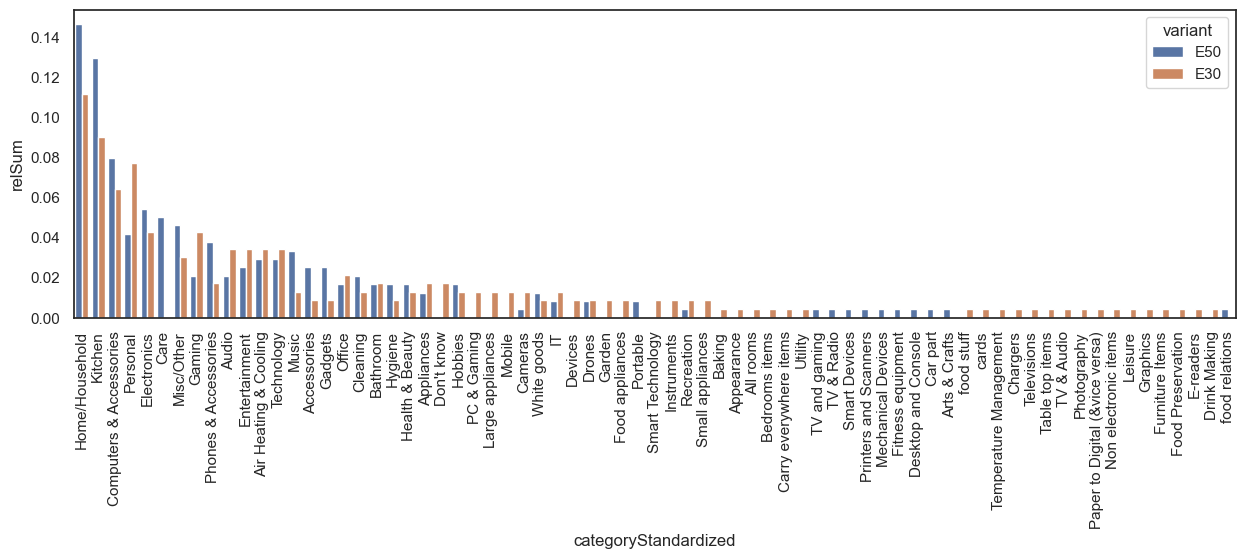

In [37]:
freq = catResults[['variant', 'categoryStandardized']].groupby(['variant', 'categoryStandardized']).size().sort_values(ascending=False).reset_index()
for variant in ['E50', 'E30', 'B50', 'B30']:
    freq.loc[freq.variant==variant, 'relSum'] = freq[freq.variant==variant][0] / catResults.groupby(['variant', 'respondent']).size().reset_index().groupby('variant').sum()[0][variant]

catlist = freq[freq[0]>3].categoryStandardized.values


_, ax = plt.subplots(figsize=(15, 4))
sns.barplot(freq[freq.variant.isin(['E50', 'E30'])], x='categoryStandardized', y='relSum', hue='variant', ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_94857/2549923423.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


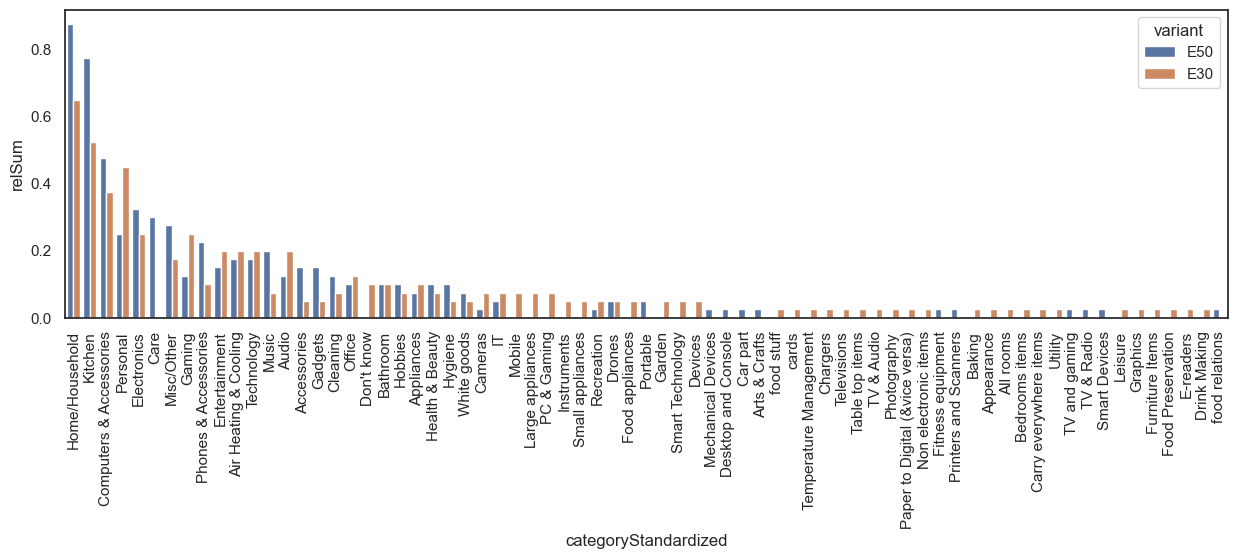

In [38]:
freq = catResults[['variant', 'categoryStandardized']].groupby(['variant', 'categoryStandardized']).size().sort_values(ascending=False).reset_index()
freq = freq.sort_values(0, ascending=False)
for variant in ['E50', 'E30', 'B50', 'B30']:
    freq.loc[freq.variant==variant, 'relSum'] = freq[freq.variant==variant][0] / 40

_, ax = plt.subplots(figsize=(15, 4))
sns.barplot(freq[freq.variant.isin(['E50', 'E30'])], x='categoryStandardized', y='relSum', hue='variant', ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [39]:
freq[(freq.variant.isin(['E50', 'E30'])) & (freq.categoryStandardized.isin(catlist))].pivot_table(index='categoryStandardized', columns='variant', values=[0, 'relSum'], aggfunc='sum').to_clipboard()
freq[(freq.variant.isin(['B50', 'B30'])) & (freq.categoryStandardized.isin(catlist))].pivot_table(index='categoryStandardized', columns='variant', values=[0, 'relSum'], aggfunc='sum').to_clipboard()

/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_94857/727475358.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


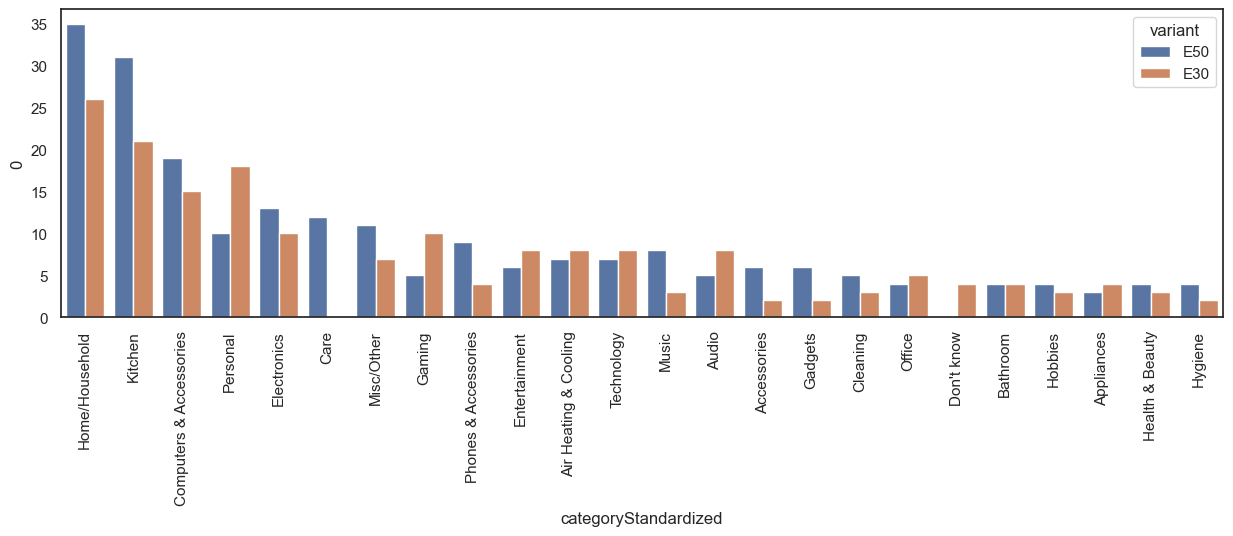

In [40]:
_, ax = plt.subplots(figsize=(15, 4))
sns.barplot(freq[(freq.variant.isin(['E50', 'E30'])) & (freq.categoryStandardized.isin(catlist))], x='categoryStandardized', y=0, hue='variant', ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_94857/2793719110.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


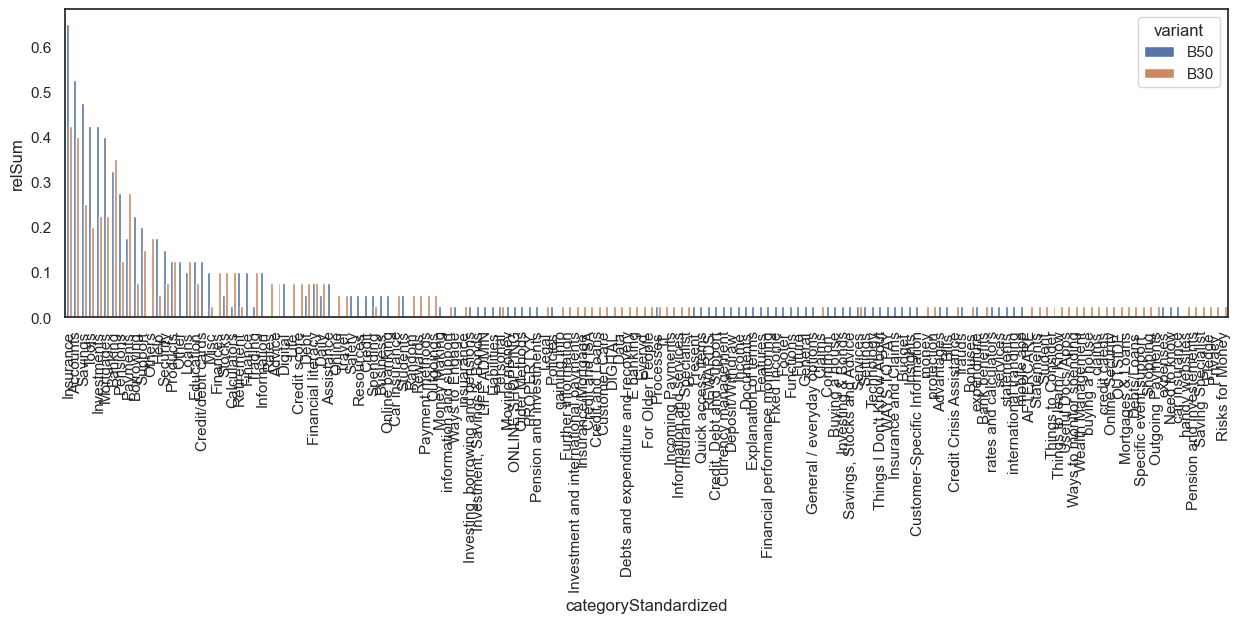

In [41]:
_, ax = plt.subplots(figsize=(15, 4))
sns.barplot(freq[freq.variant.isin(['B50', 'B30'])], x='categoryStandardized', y='relSum', hue='variant', ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_94857/702489963.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


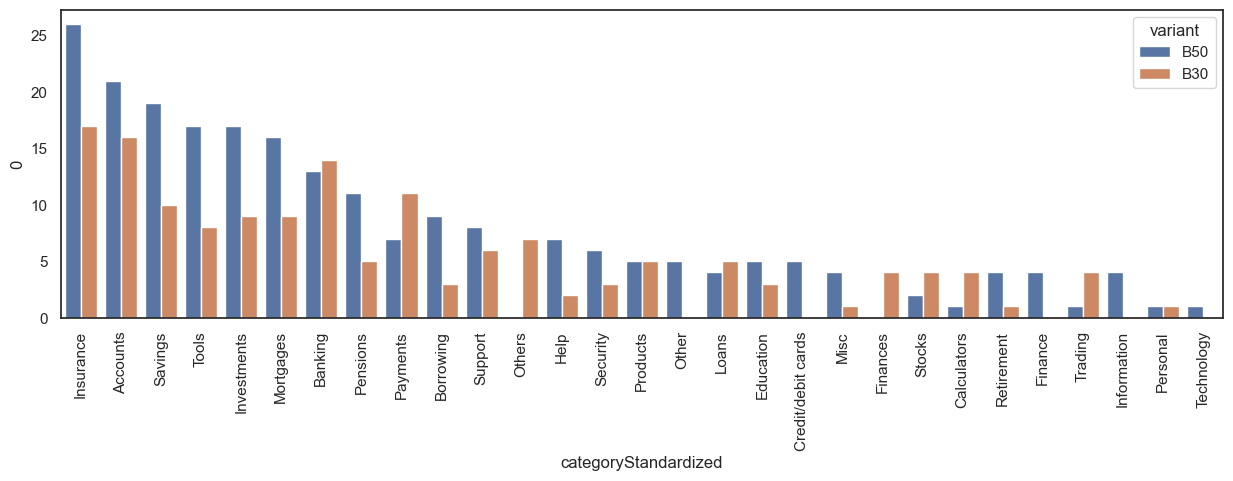

In [42]:
_, ax = plt.subplots(figsize=(15, 4))
sns.barplot(freq[(freq.variant.isin(['B50', 'B30'])) & (freq.categoryStandardized.isin(catlist))], x='categoryStandardized', y=0, hue='variant', ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [43]:
x = catResults[catResults.variant.isin(['E50', 'E30'])].groupby(['variant', 'categoryStandardized']).size().unstack().transpose()
x['sum'] = x['E50'] + x['E30']
for index, row in x.iterrows():
    pow, p, d, exp = chi2_contingency([
        [row['E50'], x['E50'].sum()], 
        [row['E30'], x['E30'].sum()]
    ])
    x.loc[index, 'chi'] = pow
    x.loc[index, 'p'] = p
    x.loc[index, 'd'] = d
    x.loc[index, '<p'] = 'yes' if p <=0.05 else ''
display(x.sort_values(ascending=False, by='sum').head(30))

variant,E30,E50,sum,chi,p,d,<p
categoryStandardized,,,,,,,
Home/Household,26.0,35.0,61.0,0.731434,0.392419,1.0,
Kitchen,21.0,31.0,52.0,1.174051,0.278570,1.0,
Computers & Accessories,15.0,19.0,34.0,0.170958,0.679262,1.0,
Personal,18.0,10.0,28.0,1.794995,0.180319,1.0,
Electronics,10.0,13.0,23.0,0.114128,0.735493,1.0,
Misc/Other,7.0,11.0,18.0,0.399898,0.527142,1.0,
Gaming,10.0,5.0,15.0,1.117584,0.290439,1.0,
Air Heating & Cooling,8.0,7.0,15.0,0.001632,0.967780,1.0,
Technology,8.0,7.0,15.0,0.001632,0.967780,1.0,


In [44]:
x = catResults[catResults.variant.isin(['B50', 'B30'])].groupby(['variant', 'categoryStandardized']).size().unstack().transpose()
x['sum'] = x['B50'] + x['B30']
for index, row in x.iterrows():
    pow, p, d, exp = chi2_contingency([
        [row['B50'], x['B50'].sum()], 
        [row['B30'], x['B30'].sum()]
    ])
    x.loc[index, 'chi'] = pow
    x.loc[index, 'p'] = p
    x.loc[index, 'd'] = d
    x.loc[index, '<p'] = 'yes' if p <=0.05 else ''
display(x.sort_values(ascending=False, by='sum').head(30))

variant,B30,B50,sum,chi,p,d,<p
categoryStandardized,,,,,,,
Insurance,17.0,26.0,43.0,0.179325,0.671954,1.0,
Accounts,16.0,21.0,37.0,0.000000,1.000000,1.0,
Savings,10.0,19.0,29.0,0.684374,0.408085,1.0,
Banking,14.0,13.0,27.0,0.349244,0.554541,1.0,
Investments,9.0,17.0,26.0,0.565445,0.452075,1.0,
Tools,8.0,17.0,25.0,0.977073,0.322923,1.0,
Mortgages,9.0,16.0,25.0,0.352632,0.552627,1.0,
Payments,11.0,7.0,18.0,1.406291,0.235673,1.0,
Pensions,5.0,11.0,16.0,0.588235,0.443102,1.0,


#### Big-5

In [45]:
for measure in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind']:
    i1E50 = respondents[respondents.variant=='E50'].sort_values(measure)[:20].respondent.values
    i2E50 = respondents[respondents.variant=='E50'].sort_values(measure)[20:].respondent.values
    r1E50 = catResults[(catResults.respondent.isin(i1E50)) & (catResults.variant=='E50')]
    r2E50 = catResults[(catResults.respondent.isin(i2E50)) & (catResults.variant=='E50')]
    i1E30 = respondents[respondents.variant=='E30'].sort_values(measure)[:20].respondent.values
    i2E30 = respondents[respondents.variant=='E30'].sort_values(measure)[20:].respondent.values
    r1E30 = catResults[(catResults.respondent.isin(i1E30)) & (catResults.variant=='E30')]
    r2E30 = catResults[(catResults.respondent.isin(i2E30)) & (catResults.variant=='E30')]
    x1 = r1E50[['categoryStandardized']].value_counts()
    y1 = r2E50[['categoryStandardized']].value_counts()
    x2 = r1E30[['categoryStandardized']].value_counts()
    y2 = r2E30[['categoryStandardized']].value_counts()
    x = pd.DataFrame(data={
        'E50less': x1,
        'E50more': y1,
        'E30less': x2,
        'E30more': y2,
    })
    x['sum'] = x['E50less'] + x['E50more']
    print(measure)
    display(x.sort_values(ascending=False, by='sum').head(20))

bfExtra


,E50less,E50more,E30less,E30more,sum
categoryStandardized,,,,,
Home/Household,17.0,18.0,14.0,12.0,35.0
Kitchen,14.0,17.0,14.0,7.0,31.0
Computers & Accessories,10.0,9.0,11.0,4.0,19.0
Electronics,7.0,6.0,6.0,4.0,13.0
Care,7.0,5.0,NaN,NaN,12.0
Misc/Other,5.0,6.0,3.0,4.0,11.0
Personal,6.0,4.0,10.0,8.0,10.0
Phones & Accessories,4.0,5.0,3.0,1.0,9.0
Music,6.0,2.0,1.0,2.0,8.0


bfAgree


,E50less,E50more,E30less,E30more,sum
categoryStandardized,,,,,
Home/Household,19.0,16.0,13.0,13.0,35.0
Kitchen,15.0,16.0,11.0,10.0,31.0
Computers & Accessories,12.0,7.0,10.0,5.0,19.0
Electronics,4.0,9.0,6.0,4.0,13.0
Care,5.0,7.0,NaN,NaN,12.0
Misc/Other,7.0,4.0,2.0,5.0,11.0
Personal,6.0,4.0,6.0,12.0,10.0
Phones & Accessories,7.0,2.0,3.0,1.0,9.0
Music,4.0,4.0,2.0,1.0,8.0


bfConsc


,E50less,E50more,E30less,E30more,sum
categoryStandardized,,,,,
Home/Household,16.0,19.0,14.0,12.0,35.0
Kitchen,15.0,16.0,12.0,9.0,31.0
Computers & Accessories,9.0,10.0,11.0,4.0,19.0
Electronics,6.0,7.0,4.0,6.0,13.0
Care,6.0,6.0,NaN,NaN,12.0
Misc/Other,5.0,6.0,2.0,5.0,11.0
Personal,5.0,5.0,7.0,11.0,10.0
Phones & Accessories,4.0,5.0,3.0,1.0,9.0
Music,5.0,3.0,2.0,1.0,8.0


bfNegEmo


,E50less,E50more,E30less,E30more,sum
categoryStandardized,,,,,
Home/Household,17.0,18.0,12.0,14.0,35.0
Kitchen,17.0,14.0,8.0,13.0,31.0
Computers & Accessories,8.0,11.0,7.0,8.0,19.0
Electronics,7.0,6.0,6.0,4.0,13.0
Care,9.0,3.0,NaN,NaN,12.0
Misc/Other,5.0,6.0,4.0,3.0,11.0
Personal,2.0,8.0,10.0,8.0,10.0
Phones & Accessories,2.0,7.0,1.0,3.0,9.0
Music,5.0,3.0,1.0,2.0,8.0


bfOpenMind


,E50less,E50more,E30less,E30more,sum
categoryStandardized,,,,,
Home/Household,15.0,20.0,10.0,16.0,35.0
Kitchen,18.0,13.0,12.0,9.0,31.0
Computers & Accessories,7.0,12.0,7.0,8.0,19.0
Electronics,8.0,5.0,6.0,4.0,13.0
Care,8.0,4.0,NaN,NaN,12.0
Misc/Other,4.0,7.0,5.0,2.0,11.0
Personal,5.0,5.0,9.0,9.0,10.0
Phones & Accessories,3.0,6.0,2.0,2.0,9.0
Music,5.0,3.0,2.0,1.0,8.0


In [46]:
for measure in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind']:
    i1E50 = respondents[respondents.variant=='B50'].sort_values(measure)[:20].respondent.values
    i2E50 = respondents[respondents.variant=='B50'].sort_values(measure)[20:].respondent.values
    r1E50 = catResults[(catResults.respondent.isin(i1E50)) & (catResults.variant=='B50')]
    r2E50 = catResults[(catResults.respondent.isin(i2E50)) & (catResults.variant=='B50')]
    i1E30 = respondents[respondents.variant=='B30'].sort_values(measure)[:20].respondent.values
    i2E30 = respondents[respondents.variant=='B30'].sort_values(measure)[20:].respondent.values
    r1E30 = catResults[(catResults.respondent.isin(i1E30)) & (catResults.variant=='B30')]
    r2E30 = catResults[(catResults.respondent.isin(i2E30)) & (catResults.variant=='B30')]
    x1 = r1E50[['categoryStandardized']].value_counts()
    y1 = r2E50[['categoryStandardized']].value_counts()
    x2 = r1E30[['categoryStandardized']].value_counts()
    y2 = r2E30[['categoryStandardized']].value_counts()
    x = pd.DataFrame(data={
        'E50less': x1,
        'E50more': y1,
        'E30less': x2,
        'E30more': y2,
    })
    x['sum'] = x['E50less'] + x['E50more']
    print(measure)
    display(x.sort_values(ascending=False, by='sum').head(20))

bfExtra


,E50less,E50more,E30less,E30more,sum
categoryStandardized,,,,,
Insurance,11.0,15.0,7.0,10.0,26.0
Accounts,9.0,12.0,10.0,6.0,21.0
Savings,9.0,10.0,5.0,5.0,19.0
Investments,8.0,9.0,5.0,4.0,17.0
Tools,12.0,5.0,6.0,2.0,17.0
Mortgages,7.0,9.0,5.0,4.0,16.0
Banking,8.0,5.0,7.0,7.0,13.0
Pensions,5.0,6.0,3.0,2.0,11.0
Borrowing,6.0,3.0,1.0,2.0,9.0


bfAgree


,E50less,E50more,E30less,E30more,sum
categoryStandardized,,,,,
Insurance,12.0,14.0,9.0,8.0,26.0
Accounts,13.0,8.0,6.0,10.0,21.0
Savings,11.0,8.0,3.0,7.0,19.0
Investments,9.0,8.0,6.0,3.0,17.0
Tools,9.0,8.0,4.0,4.0,17.0
Mortgages,6.0,10.0,4.0,5.0,16.0
Banking,8.0,5.0,8.0,6.0,13.0
Pensions,3.0,8.0,1.0,4.0,11.0
Borrowing,5.0,4.0,NaN,3.0,9.0


bfConsc


,E50less,E50more,E30less,E30more,sum
categoryStandardized,,,,,
Insurance,12.0,14.0,9.0,8.0,26.0
Accounts,12.0,9.0,8.0,8.0,21.0
Savings,11.0,8.0,5.0,5.0,19.0
Investments,6.0,11.0,3.0,6.0,17.0
Tools,8.0,9.0,6.0,2.0,17.0
Mortgages,7.0,9.0,5.0,4.0,16.0
Banking,7.0,6.0,6.0,8.0,13.0
Pensions,5.0,6.0,3.0,2.0,11.0
Borrowing,7.0,2.0,1.0,2.0,9.0


bfNegEmo


,E50less,E50more,E30less,E30more,sum
categoryStandardized,,,,,
Insurance,15.0,11.0,9.0,8.0,26.0
Accounts,9.0,12.0,5.0,11.0,21.0
Savings,10.0,9.0,4.0,6.0,19.0
Investments,10.0,7.0,6.0,3.0,17.0
Tools,7.0,10.0,2.0,6.0,17.0
Mortgages,11.0,5.0,6.0,3.0,16.0
Banking,3.0,10.0,9.0,5.0,13.0
Pensions,7.0,4.0,3.0,2.0,11.0
Borrowing,4.0,5.0,1.0,2.0,9.0


bfOpenMind


,E50less,E50more,E30less,E30more,sum
categoryStandardized,,,,,
Insurance,14.0,12.0,9.0,8.0,26.0
Accounts,12.0,9.0,7.0,9.0,21.0
Savings,9.0,10.0,7.0,3.0,19.0
Investments,10.0,7.0,5.0,4.0,17.0
Tools,14.0,3.0,4.0,4.0,17.0
Mortgages,8.0,8.0,4.0,5.0,16.0
Banking,8.0,5.0,7.0,7.0,13.0
Pensions,4.0,7.0,3.0,2.0,11.0
Borrowing,4.0,5.0,3.0,NaN,9.0


#### CRT

In [47]:
i1E50 = respondents[respondents.variant=='E50'].sort_values('crt')[:20].respondent.values
i2E50 = respondents[respondents.variant=='E50'].sort_values('crt')[20:].respondent.values
r1E50 = catResults[(catResults.respondent.isin(i1E50)) & (catResults.variant=='E50')]
r2E50 = catResults[(catResults.respondent.isin(i2E50)) & (catResults.variant=='E50')]
i1E30 = respondents[respondents.variant=='E30'].sort_values('crt')[:20].respondent.values
i2E30 = respondents[respondents.variant=='E30'].sort_values('crt')[20:].respondent.values
r1E30 = catResults[(catResults.respondent.isin(i1E30)) & (catResults.variant=='E30')]
r2E30 = catResults[(catResults.respondent.isin(i2E30)) & (catResults.variant=='E30')]
x1 = r1E50[['categoryStandardized']].value_counts()
y1 = r2E50[['categoryStandardized']].value_counts()
x2 = r1E30[['categoryStandardized']].value_counts()
y2 = r2E30[['categoryStandardized']].value_counts()
x = pd.DataFrame(data={
    'E50lessCRT': x1,
    'E50moreCRT': y1,
    'E30lessCRT': x2,
    'E30moreCRT': y2,
})
x['sum'] = x['E50lessCRT'] + x['E50moreCRT']
display(x.sort_values(ascending=False, by='sum').head(20))

,E50lessCRT,E50moreCRT,E30lessCRT,E30moreCRT,sum
categoryStandardized,,,,,
Home/Household,17.0,18.0,15.0,11.0,35.0
Kitchen,14.0,17.0,11.0,10.0,31.0
Computers & Accessories,8.0,11.0,8.0,7.0,19.0
Electronics,7.0,6.0,6.0,4.0,13.0
Care,5.0,7.0,NaN,NaN,12.0
Misc/Other,3.0,8.0,4.0,3.0,11.0
Personal,6.0,4.0,9.0,9.0,10.0
Phones & Accessories,4.0,5.0,1.0,3.0,9.0
Music,5.0,3.0,3.0,NaN,8.0


In [48]:
i1E50 = respondents[respondents.variant=='B50'].sort_values('crt')[:20].respondent.values
i2E50 = respondents[respondents.variant=='B50'].sort_values('crt')[20:].respondent.values
r1E50 = catResults[(catResults.respondent.isin(i1E50)) & (catResults.variant=='B50')]
r2E50 = catResults[(catResults.respondent.isin(i2E50)) & (catResults.variant=='B50')]
i1E30 = respondents[respondents.variant=='B30'].sort_values('crt')[:20].respondent.values
i2E30 = respondents[respondents.variant=='B30'].sort_values('crt')[20:].respondent.values
r1E30 = catResults[(catResults.respondent.isin(i1E30)) & (catResults.variant=='B30')]
r2E30 = catResults[(catResults.respondent.isin(i2E30)) & (catResults.variant=='B30')]
x1 = r1E50[['categoryStandardized']].value_counts()
y1 = r2E50[['categoryStandardized']].value_counts()
x2 = r1E30[['categoryStandardized']].value_counts()
y2 = r2E30[['categoryStandardized']].value_counts()
x = pd.DataFrame(data={
    'B50lessCRT': x1,
    'B50moreCRT': y1,
    'B30lessCRT': x2,
    'B30moreCRT': y2,
})
x['sum'] = x['B50lessCRT'] + x['B50moreCRT']
display(x.sort_values(ascending=False, by='sum').head(20))

,B50lessCRT,B50moreCRT,B30lessCRT,B30moreCRT,sum
categoryStandardized,,,,,
Insurance,12.0,14.0,10.0,7.0,26.0
Accounts,10.0,11.0,10.0,6.0,21.0
Savings,10.0,9.0,6.0,4.0,19.0
Investments,9.0,8.0,3.0,6.0,17.0
Tools,12.0,5.0,4.0,4.0,17.0
Mortgages,9.0,7.0,7.0,2.0,16.0
Banking,7.0,6.0,8.0,6.0,13.0
Pensions,4.0,7.0,5.0,NaN,11.0
Borrowing,1.0,8.0,1.0,2.0,9.0


In [49]:
data = []

for trait in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'crt']:
    for variant in ['E50', 'E30', 'B50', 'B30']:
        nonstandardized = catResults[(catResults.variant==variant) & (~catResults.categoryStandardized.duplicated(keep=False))].categoryStandardized.values

        low = respondents[respondents.variant==variant].sort_values(trait)[:13].respondent.values
        high = respondents[respondents.variant==variant].sort_values(trait)[27:].respondent.values
        x = catResults[(catResults.respondent.isin(low)) & (catResults.variant==variant)]
        y = catResults[(catResults.respondent.isin(high)) & (catResults.variant==variant)]
        xx = results[(results.respondent.isin(low)) & (results.variant==variant)]
        yy = results[(results.respondent.isin(high)) & (results.variant==variant)]
        low_count = x[['variant','categoryStandardized']].value_counts().unstack().transpose().count().values[0]
        high_count = y[['variant','categoryStandardized']].value_counts().unstack().transpose().count().values[0]
        low_countC = xx[['variant','categoryId']].value_counts().unstack().transpose().count().values[0]
        high_countC = yy[['variant','categoryId']].value_counts().unstack().transpose().count().values[0]

        data.append([trait, variant, 'Low', low_count, np.round(xx.agreement.mean(), 2), low_countC, x[x.categoryStandardized.isin(nonstandardized)].shape[0]])
        data.append([trait, variant, 'High', high_count, np.round(yy.agreement.mean(), 2), high_countC, y[y.categoryStandardized.isin(nonstandardized)].shape[0]])

data = pd.DataFrame(data)

In [50]:
for trait in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'crt']:
    for variant in ['E50', 'E30', 'B50', 'B30']:
        stat, p, d, _ = chi2_contingency([data[(data[0]==trait) & (data[1]==variant)][[3, 5]]])
        print(p)

0.47309980383118955
0.5945799406280963
1.0
1.0
0.6700353822837353
0.7892670132906797
0.6279445411001547
0.7116644423815081
0.8802235932028138
1.0
1.0
0.8354457323208447
0.9391936165277701
0.7725520889035211
0.8121245737599451
0.3063458396539418
0.8646613249263648
0.5923513589672909
0.43675454065618224
1.0
0.5288000729011615
0.485190088800892
0.8834472572965358
0.6591897434608511


/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_94857/2880625526.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_94857/2880625526.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_94857/2880625526.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_94857/2880625526.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or u

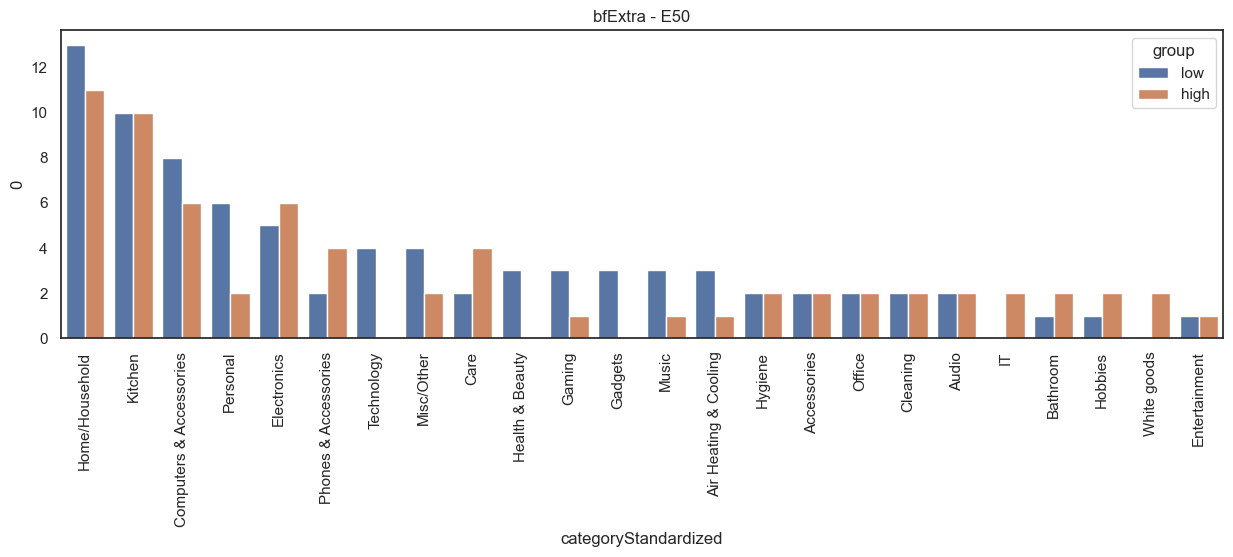

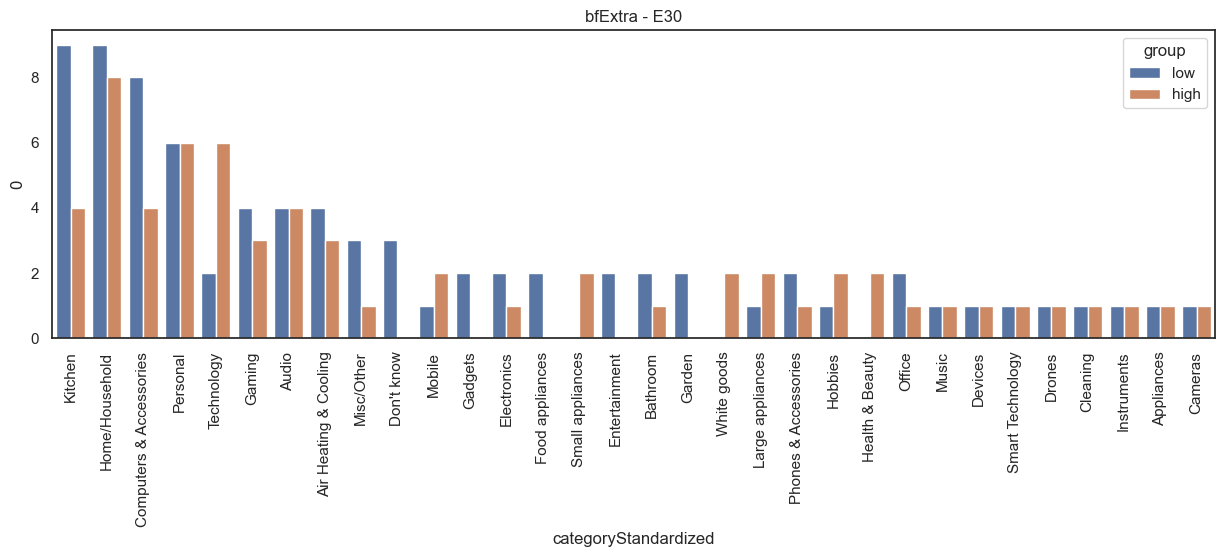

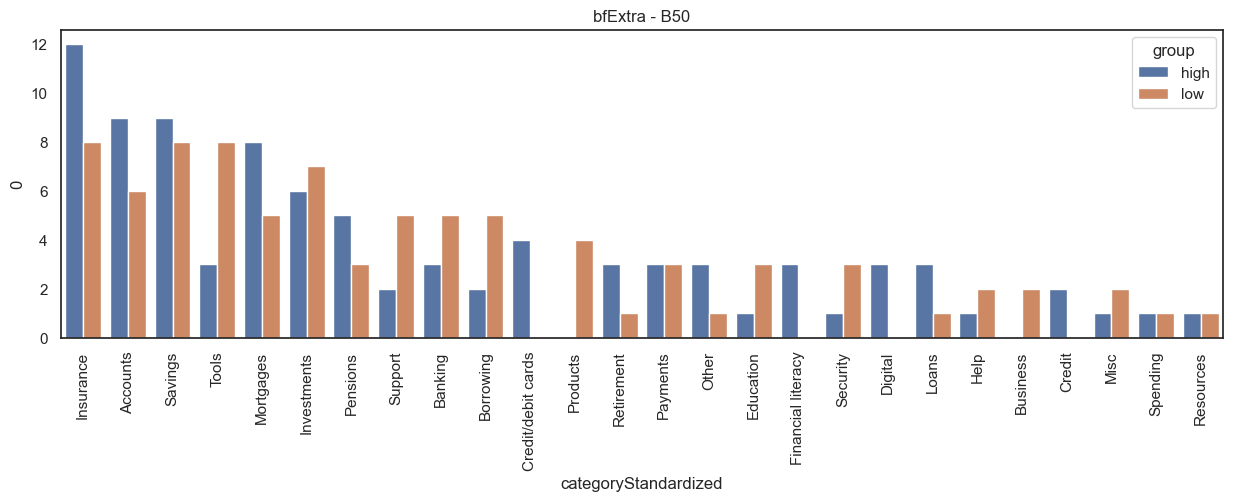

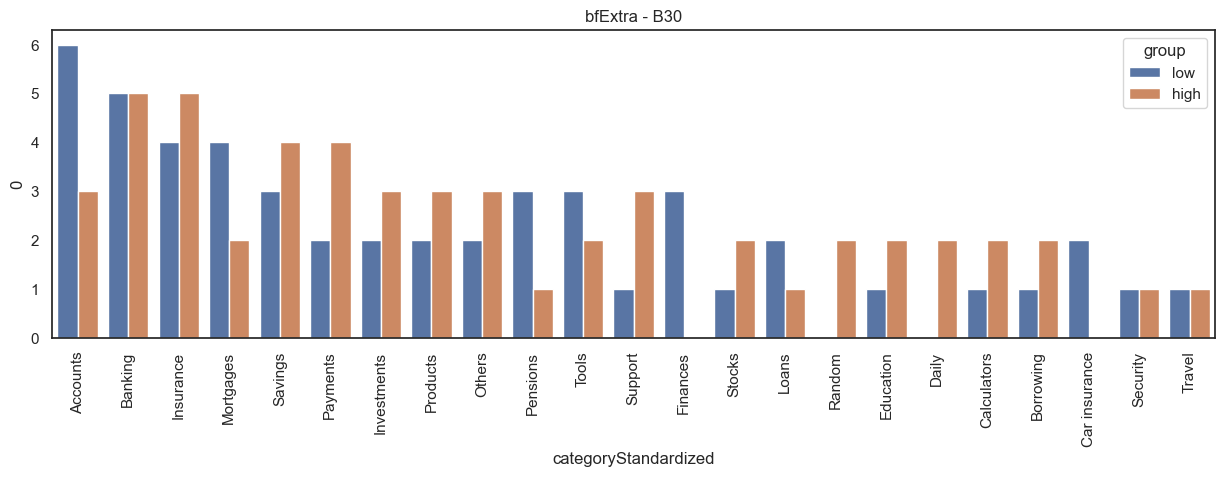

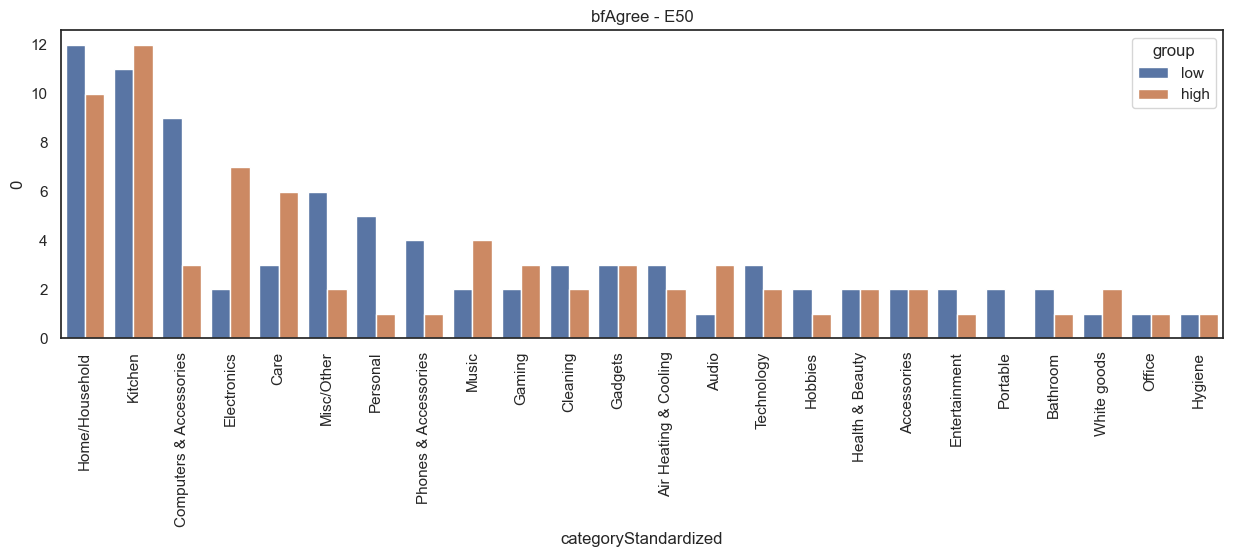

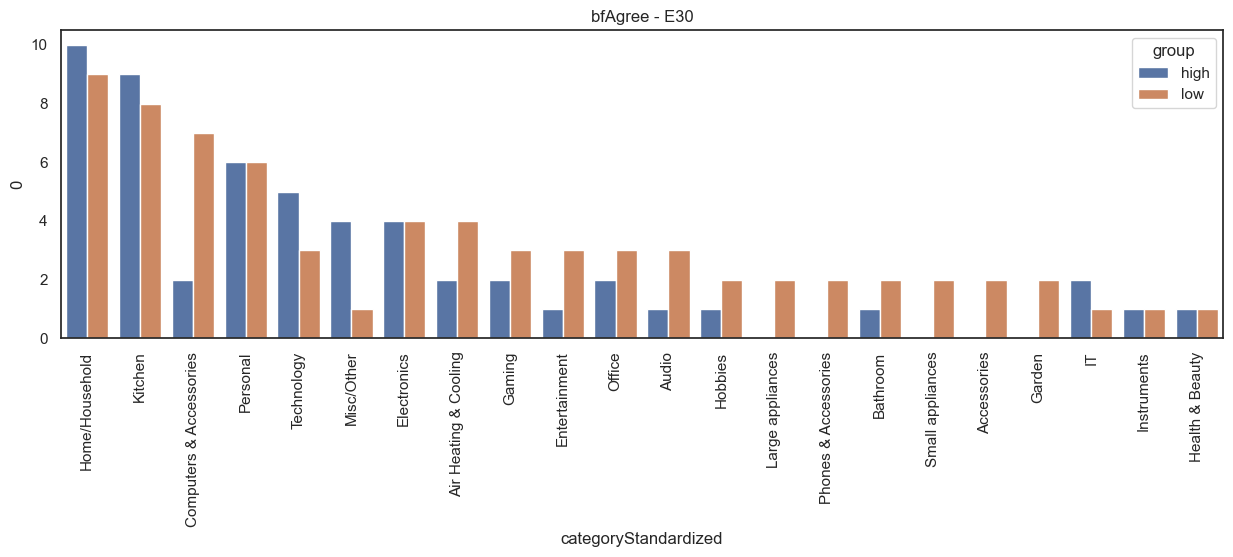

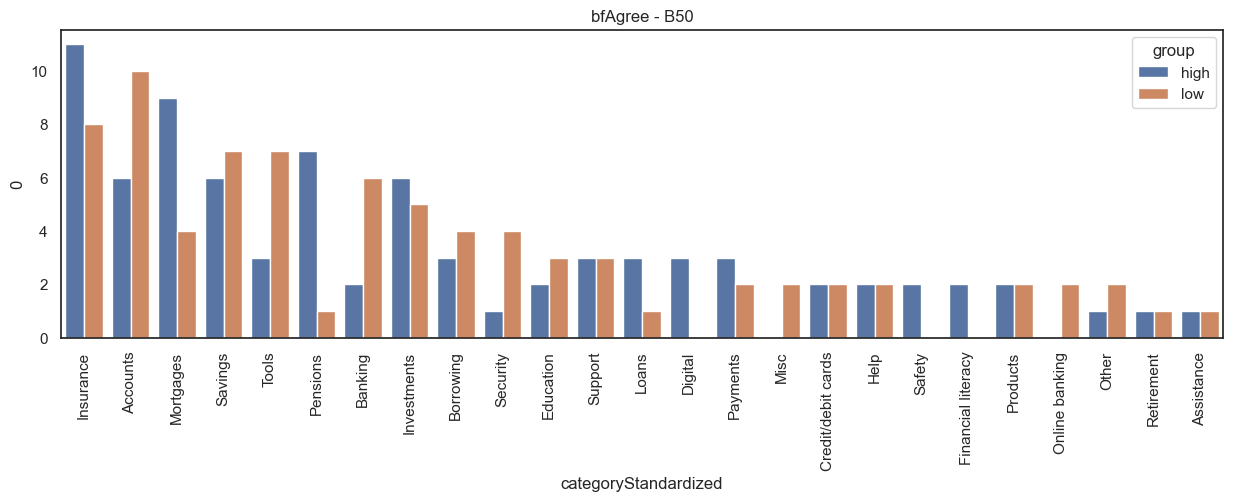

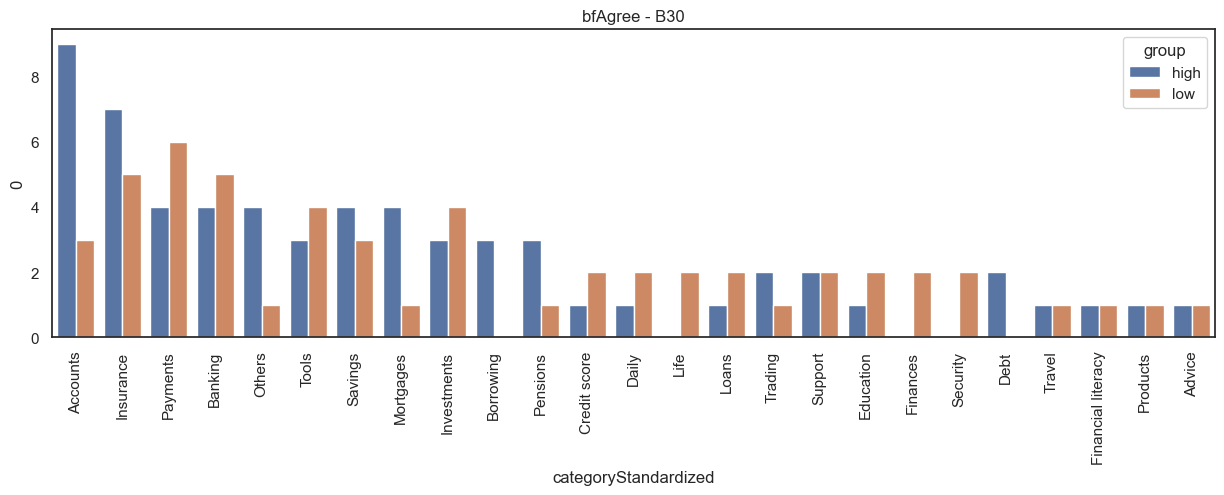

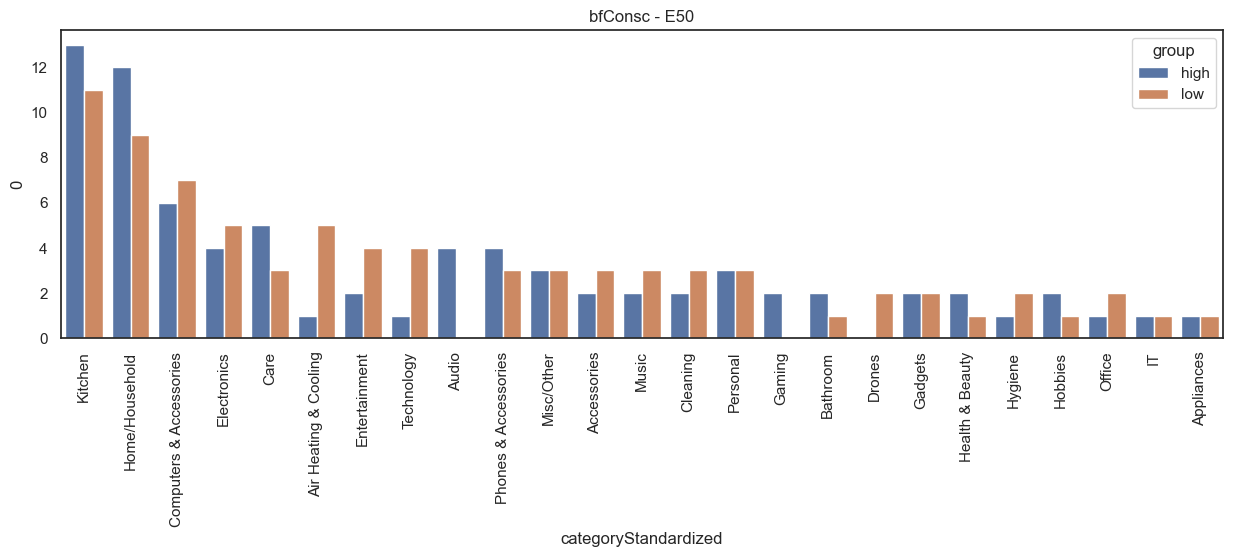

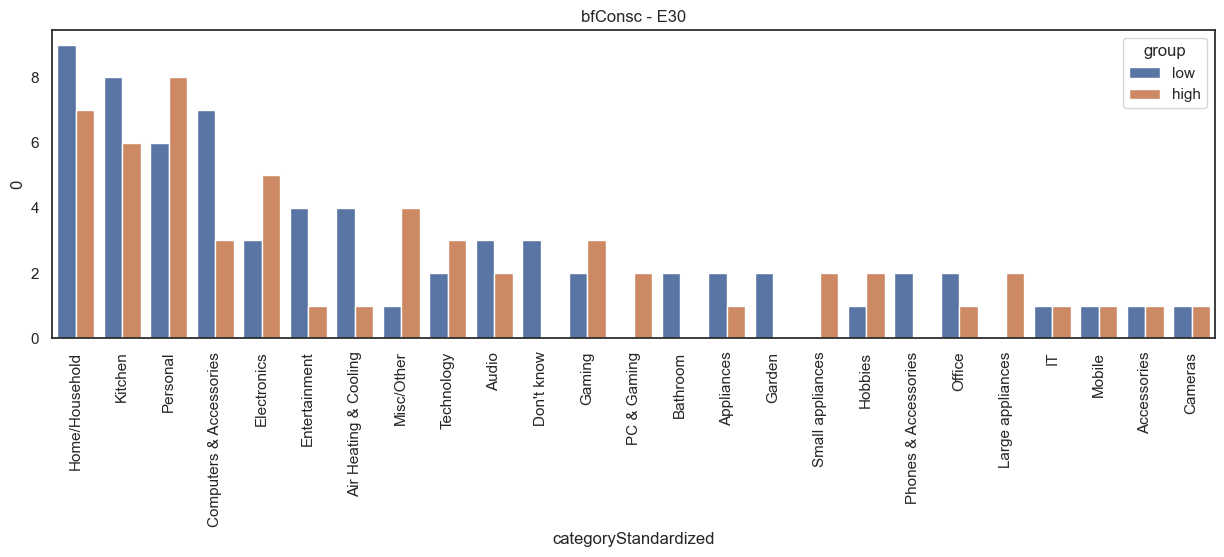

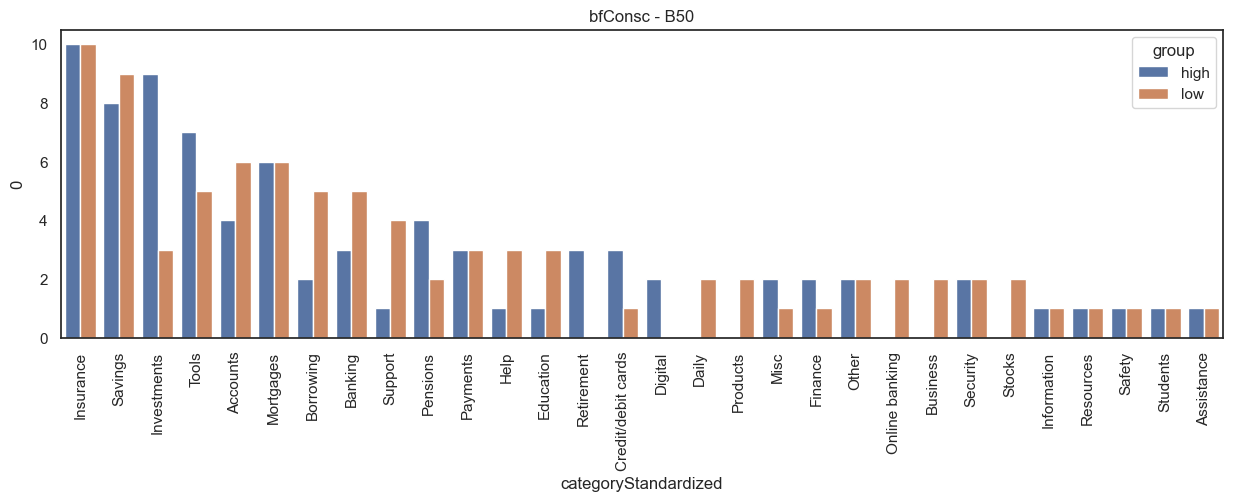

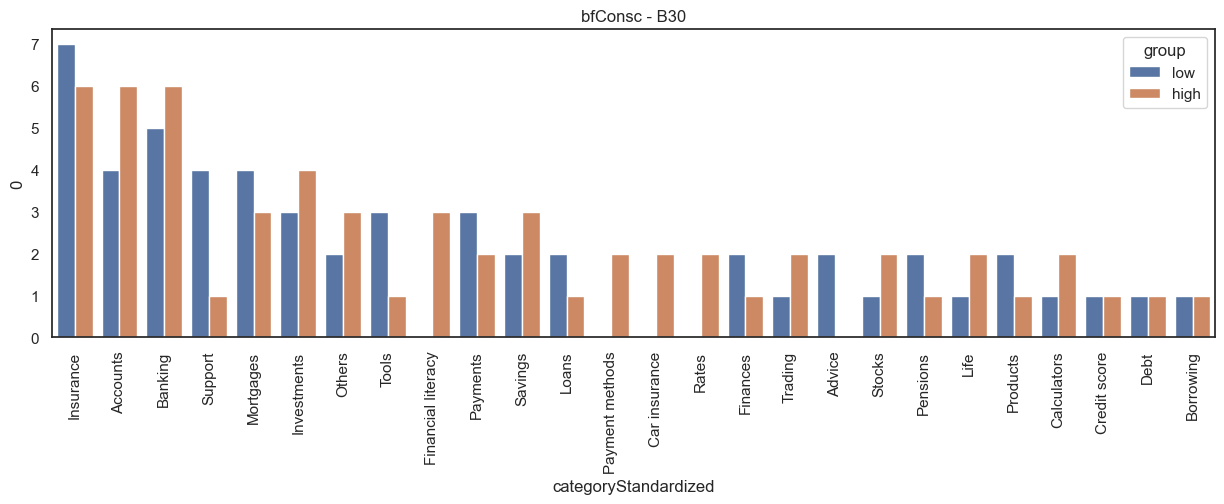

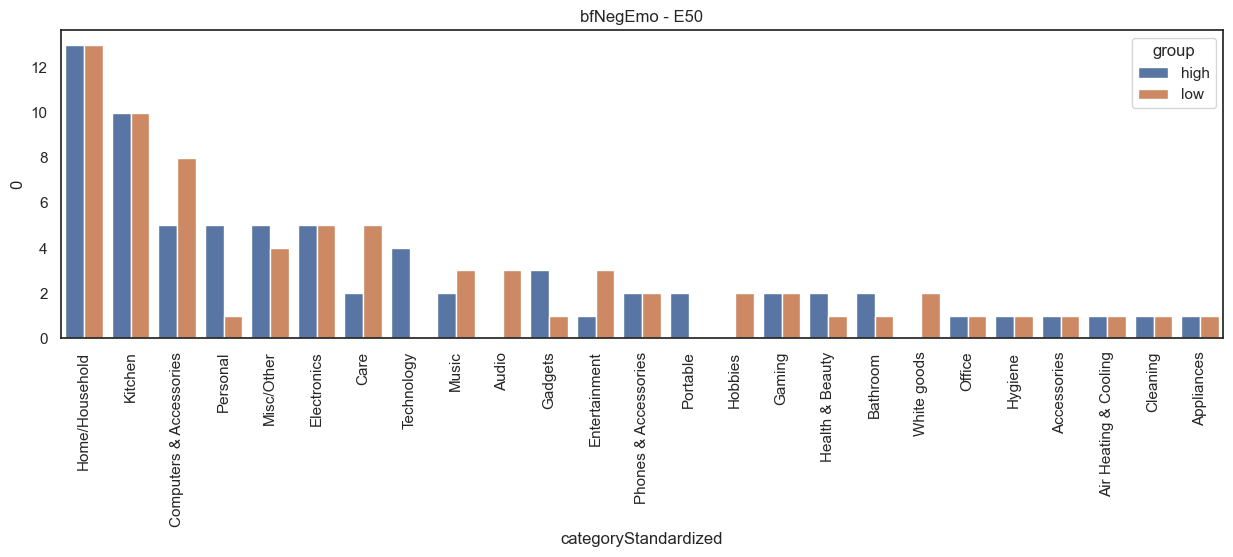

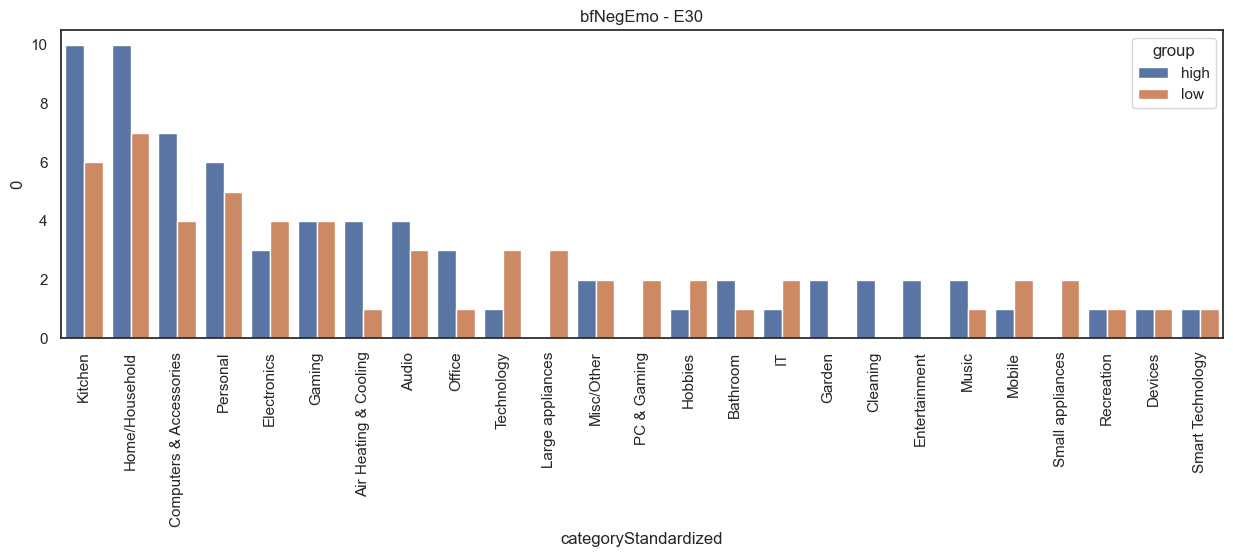

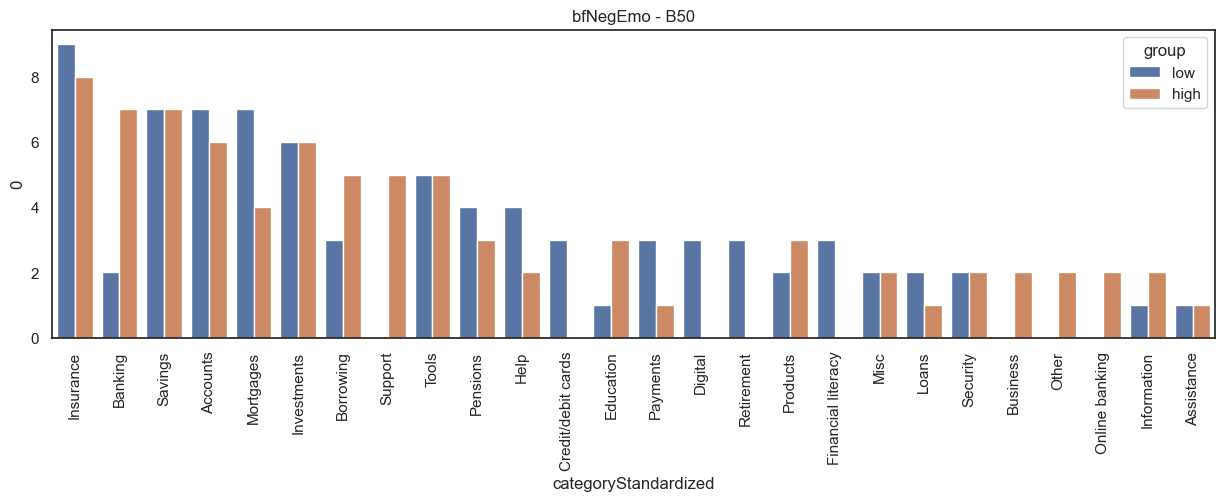

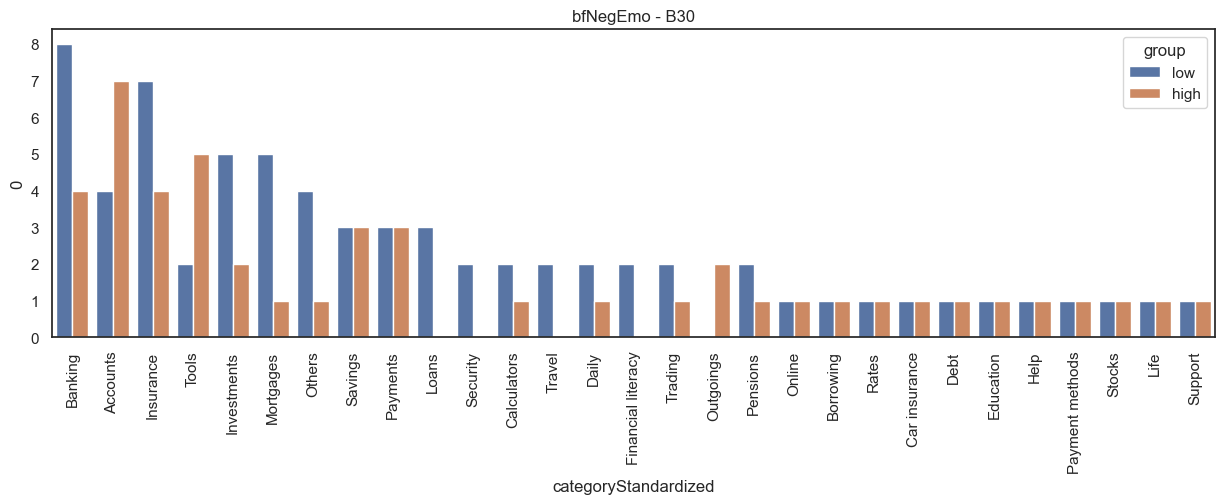

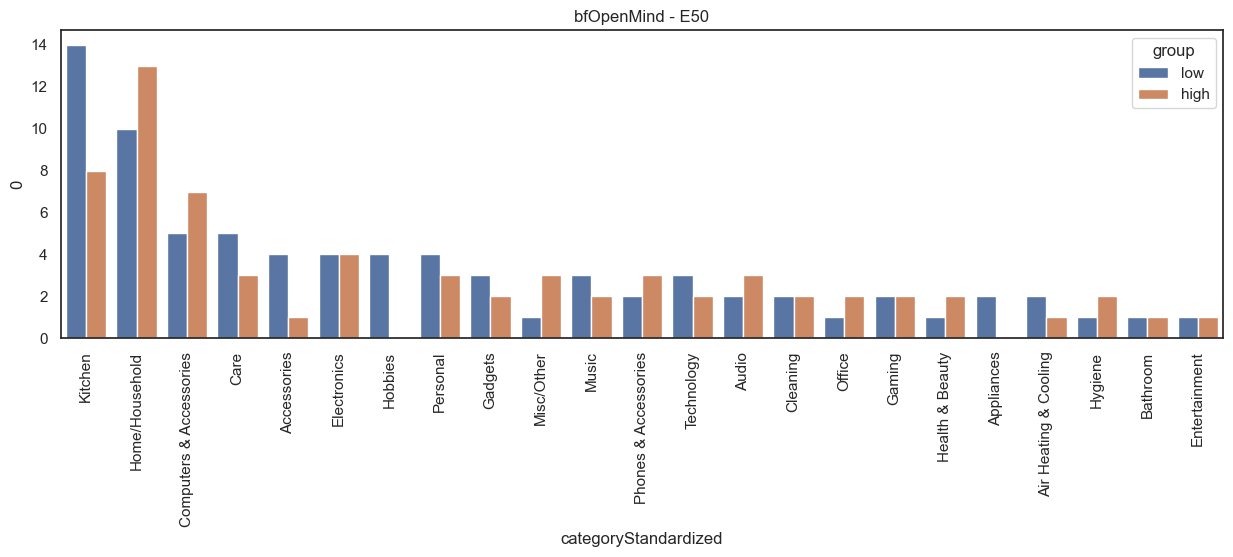

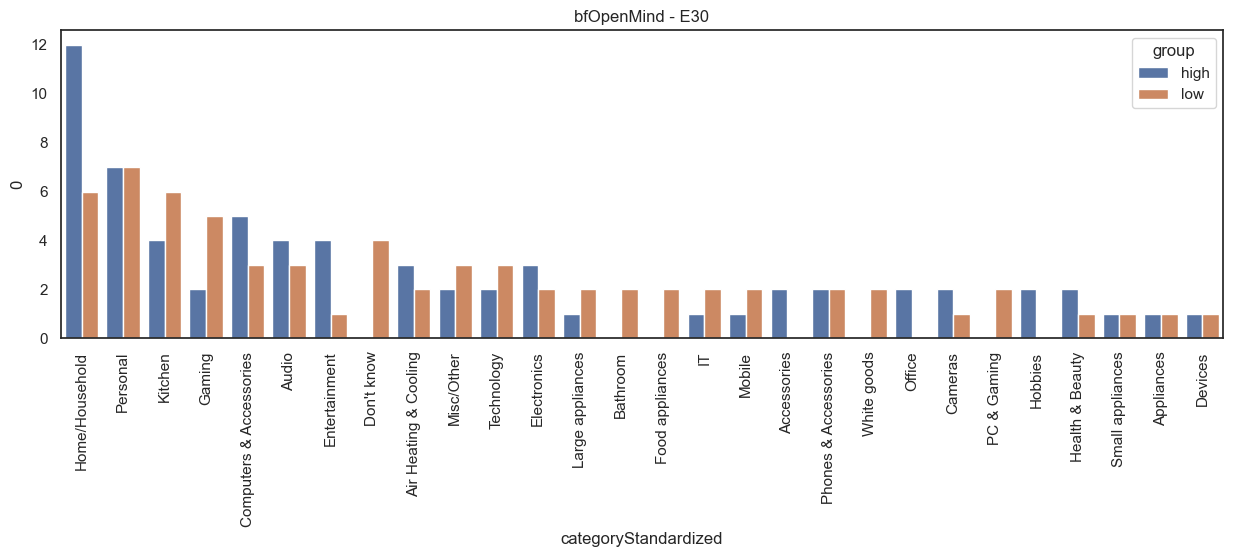

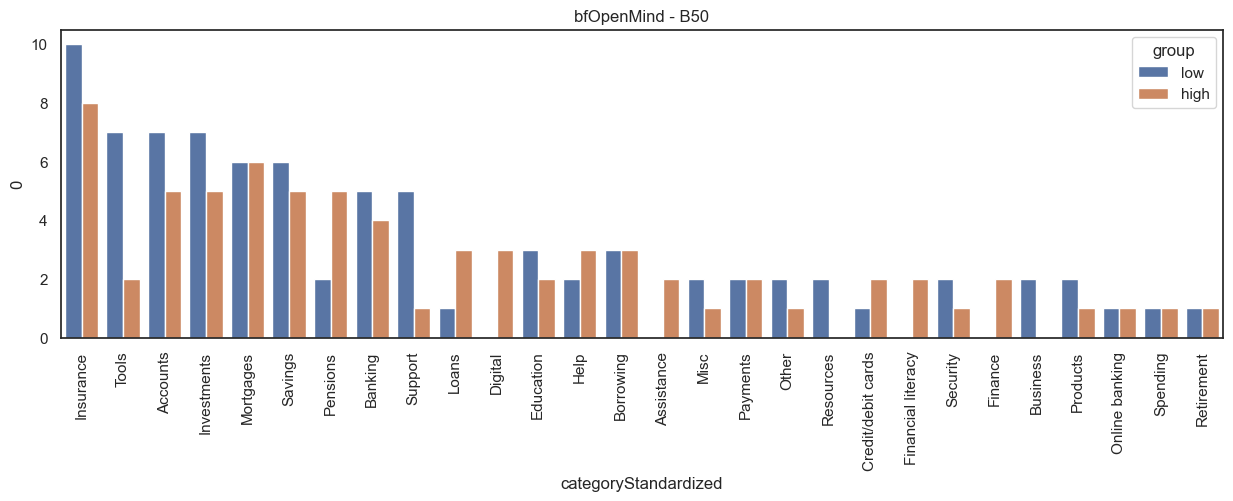

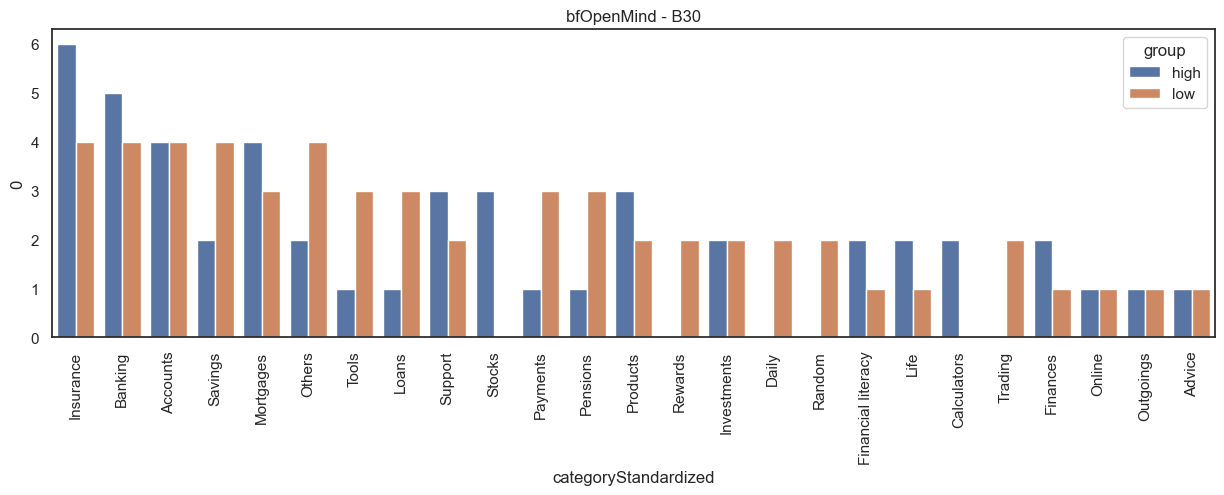

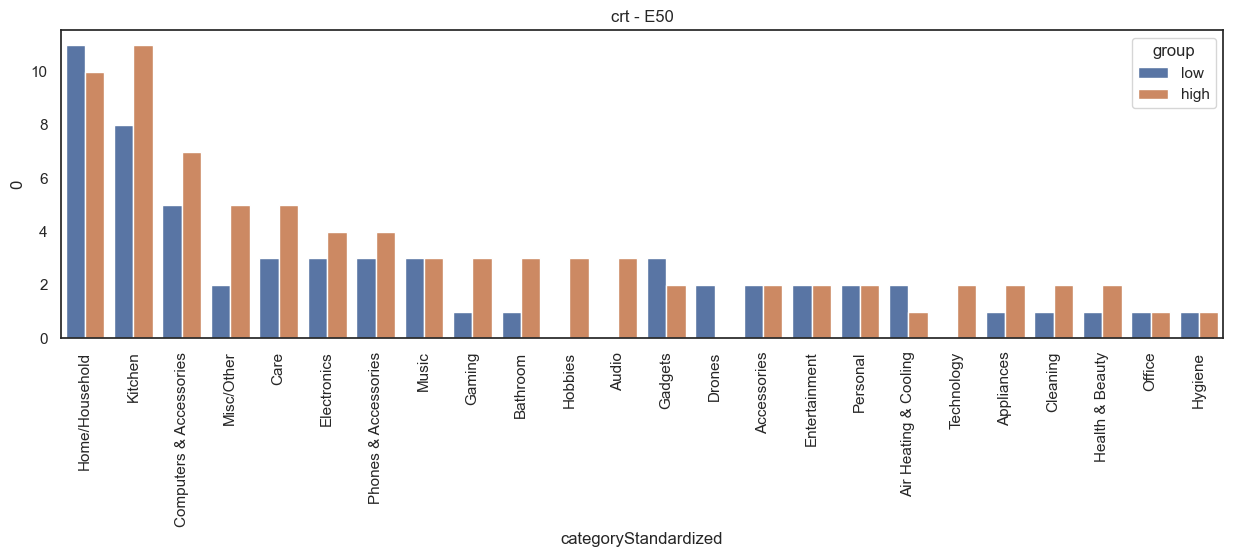

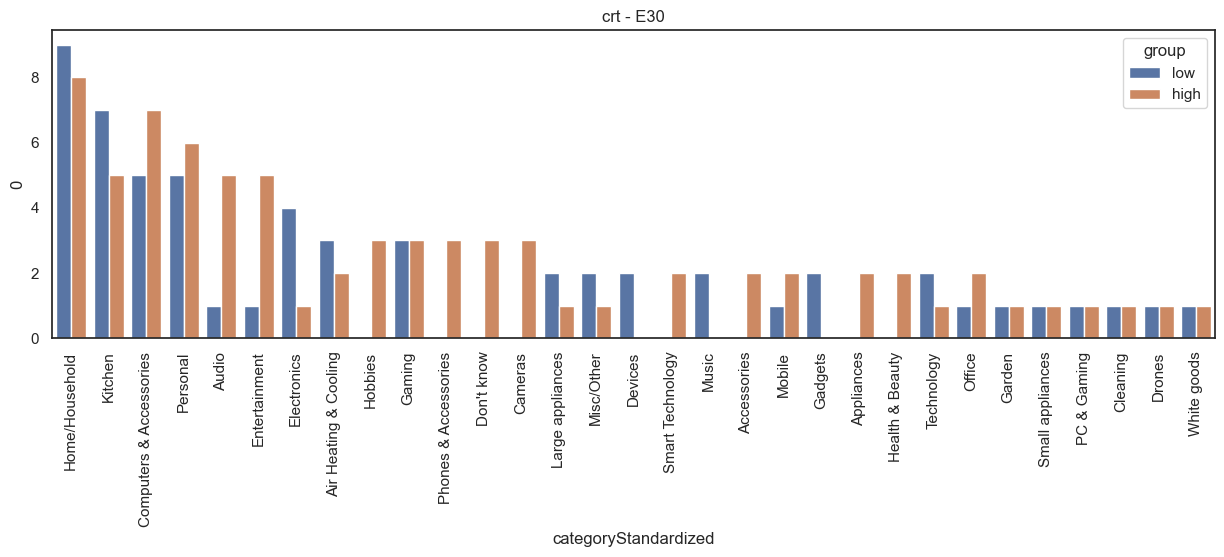

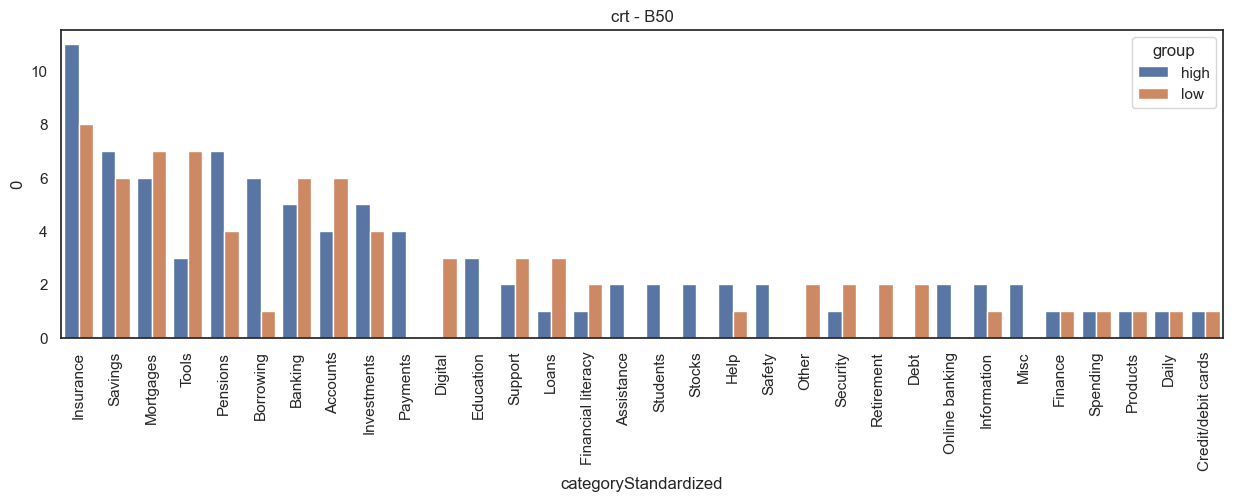

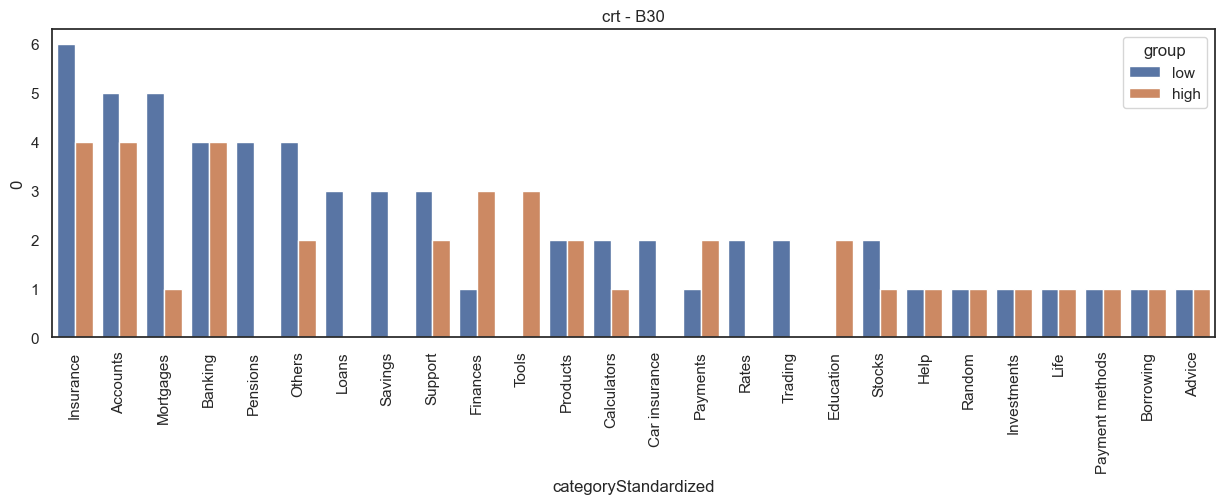

In [51]:
for trait in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'crt']:
    for variant in ['E50', 'E30', 'B50', 'B30']:
        low = respondents[respondents.variant==variant].sort_values(trait)[:13].respondent.values
        high = respondents[respondents.variant==variant].sort_values(trait)[27:].respondent.values
        x = catResults[(catResults.respondent.isin(low)) & (catResults.variant==variant)].copy(deep=True)
        y = catResults[(catResults.respondent.isin(high)) & (catResults.variant==variant)].copy(deep=True)

        x['group'] = 'low'
        y['group'] = 'high'

        freq = pd.concat([x, y]).groupby(['categoryStandardized']).size().reset_index()
        freq = freq[freq[0] >= 2].categoryStandardized.values
        temp = pd.concat([x, y]).groupby(['group', 'categoryStandardized']).size().reset_index().sort_values(0, ascending=False)

        _, ax = plt.subplots(figsize=(15, 4))
        sns.barplot(temp[temp.categoryStandardized.isin(freq)], x='categoryStandardized', y=0, hue='group', ax=ax)
        ax.set_title(trait + ' - ' + variant)
        _ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

## Agreement scores

In [52]:
catResults = results.drop_duplicates(subset=['variant', 'categoryStandardized'], keep='first').reset_index(drop=True)

In [53]:
catResults.groupby(['variant']).agreement.mean()

variant
B30    46.039527
B50    47.366632
E30    53.805298
E50    52.403597
Name: agreement, dtype: float64

In [54]:
results

,respondent,card,category,categoryId,categoryStandardized,order,variant,categoryEdited,agreement
0,5,Air Conditioners,White Goods / Household items,1,White goods,16,E50,white goods household items,53.333333
1,5,Air Purifiers,White Goods / Household items,1,White goods,10,E50,white goods household items,53.333333
2,5,Cameras,Electrical items,2,Electronics,25,E50,electrical items,33.384615
3,5,Chargers,Electrical items,2,Electronics,18,E50,electrical items,33.384615
4,5,Coffee Makers,White Goods / Household items,1,White goods,15,E50,white goods household items,53.333333
...,...,...,...,...,...,...,...,...,...
6395,65,Savings Options,Bank products,303,Products,6,B30,bank products,36.363636
6396,65,Self-Invested Personal Pension (SIPP),Bank products,303,Products,12,B30,bank products,36.363636
6397,65,Stock Trading and Shares,Bank products,303,Products,7,B30,bank products,36.363636
6398,65,Student account,Bank products,303,Products,1,B30,bank products,36.363636


In [55]:
catResults.sort_values('agreement')[['categoryStandardized']].head(20).values

array([['Misc/Other'],
       ['Personal'],
       ['Misc/Other'],
       ['Others'],
       ['Accounts'],
       ['Home/Household'],
       ['Accounts'],
       ['Savings'],
       ['Savings'],
       ['Tools'],
       ['Banking'],
       ['Payments'],
       ['Gaming'],
       ['Personal'],
       ['Home/Household'],
       ['Electronics'],
       ['Mortgages'],
       ['Mortgages'],
       ['Loans'],
       ['Support']], dtype=object)

In [56]:
kruskal(
    catResults[catResults.variant=='E50'].agreement.dropna().values,
    catResults[catResults.variant=='E30'].agreement.dropna().values,
    catResults[catResults.variant=='B50'].agreement.dropna().values,
    catResults[catResults.variant=='B30'].agreement.dropna().values,
)

KruskalResult(statistic=np.float64(3.566019267401532), pvalue=np.float64(0.3123000460257238))

In [57]:
for measure in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'crt']:
    for variant in ['E50', 'E30', 'B50', 'B30']:
        r1, r2 = getHalves(respondents, results, variant, measure)
        print(variant, measure)
        print(r1.agreement.mean())
        print(r2.agreement.mean())


E50 bfExtra
45.287023014351355
44.95826167126067
E30 bfExtra
38.06279686820964
40.243805863161064
B50 bfExtra
37.96154515932244
34.17565936068887
B30 bfExtra
34.34401994122795
33.73458729739103
E50 bfAgree
46.31809466992481
43.922511721950876
E30 bfAgree
41.018392689886525
37.16473177730685
B50 bfAgree
35.10544820944543
36.91053735305084
B30 bfAgree
34.39657544493444
33.672638249504445
E50 bfConsc
45.645659799986156
44.61606718008525
E30 bfConsc
40.641984214087636
37.606712891741715
B50 bfConsc
37.329691683289525
34.88509008045671
B30 bfConsc
33.393637587060105
34.67062870212253
E50 bfNegEmo
45.05384302319296
45.19486589765214
E30 bfNegEmo
37.817621140111335
40.441453759131385
B50 bfNegEmo
36.22413276102688
35.831231972896596
B30 bfNegEmo
34.020900339706856
34.060513408125786
E50 bfOpenMind
47.01262283558393
43.19617894638615
E30 bfOpenMind
41.03457287785279
37.328250055390335
B50 bfOpenMind
33.98547199068266
38.225920987138664
B30 bfOpenMind
34.542234954568634
33.52066891375323
E50 cr

## Effort check

In [58]:
corrs = {}
for variant in ['E50', 'E30', 'B50', 'B30']:
    corrs[variant] = {}
    tmp = results[results.variant==variant]
    cards = cardsE if variant in ['E30', 'E50'] else cardsB
    m = makeMatrix('similarity', tmp, cards, 40)
    for i in tmp.respondent.unique():
        corrs[variant][int(i)] = float(mantel(m, np.matrix(makeMatrix('similarity', tmp[tmp.respondent == i], cards, 1)))[0])

In [59]:
sorted(corrs['E50'].items(), key=lambda x:x[1])[:10]

[(8, 0.370016528125725),
 (13, 0.5026830271575127),
 (51, 0.5110916676655335),
 (33, 0.5167152241676223),
 (39, 0.5502353516227736),
 (47, 0.5679385237820009),
 (55, 0.5738934828119763),
 (53, 0.5813640710085912),
 (28, 0.5858454054444255),
 (6, 0.5950396550707411)]

In [60]:
sorted(corrs['E30'].items(), key=lambda x:x[1])[:10]

[(9, 0.17598825959235753),
 (20, 0.21309600808611906),
 (46, 0.2236113143114854),
 (39, 0.2584345521225029),
 (19, 0.27173356357070766),
 (24, 0.2744539633425125),
 (15, 0.2789958183571999),
 (4, 0.28049231545831765),
 (17, 0.29424039264849877),
 (6, 0.29571209098782514)]

In [61]:
sorted(corrs['B50'].items(), key=lambda x:x[1])[:10]

[(44, 0.18238081023505504),
 (49, 0.1927475150942659),
 (31, 0.29606871791385553),
 (30, 0.2980381437938935),
 (32, 0.29961375913437266),
 (51, 0.30264386727492304),
 (22, 0.31404923418535924),
 (48, 0.32516266835293983),
 (42, 0.335667949185342),
 (26, 0.33899243588094563)]

In [62]:
sorted(corrs['B30'].items(), key=lambda x:x[1])[:10]

[(26, 0.10013467083517827),
 (13, 0.12940542354858867),
 (10, 0.1387626717060506),
 (8, 0.1462222331457616),
 (46, 0.16017595630842177),
 (65, 0.17379618775001793),
 (11, 0.17599464711723511),
 (45, 0.18342987713661063),
 (14, 0.18778945546716744),
 (50, 0.18838098219409904)]